# Distributions of all the events in the dataset

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os

sys.path.append(os.path.abspath(os.path.join('..')))
sys.path.append('/home/fcufino/ETH_faser/Utils')

from Utils.plot import *
from Utils.event_filter import *
from Utils.ID_events import *

In [3]:
folder_path = "/scratch3/salonso/faser/events_v3.5"  
output_folder = "/scratch/fcufino"
plot_folder = "/home/fcufino/ETH_faser/Plots/Plots"

os.makedirs(output_folder, exist_ok=True)

In [4]:
variables_to_extract = ['e_vis', 'sp_momentum', 'vis_sp_momentum', 'jet_momentum', 'pt_miss',
                        'in_neutrino_momentum', 'in_neutrino_energy',
                        'out_lepton_momentum', 'out_lepton_energy',
                        'rear_cal_energy', 'rear_hcal_energy', 'rear_mucal_energy','faser_cal_energy', 'reco_hits', 'primary_vertex', 'primlepton_labels', 'seg_labels']

id_features = ["run_number", "event_id", "is_cc", "in_neutrino_pdg"]

In [5]:
#manually set 
RESCAN_ALL_EVENTS = False

In [6]:
#if the files exist load the data otherwise create the files
if os.path.exists(output_folder + "/data_filter.npz") and not RESCAN_ALL_EVENTS:
    #read the existig file
    data_filter = np.load(output_folder + "/data_filter.npz")

elif RESCAN_ALL_EVENTS:
    #Rescan all events
    data_filter = load_variables_from_npz(folder_path, id_features, num_workers=32)
    np.savez(output_folder + "/data_filter.npz", **data_filter)

In [7]:
#if the files exist load the data otherwise create the files
if not RESCAN_ALL_EVENTS and os.path.exists(f"{output_folder}/data_nc.npz") and os.path.exists(f"{output_folder}/data_nu_e.npz") and os.path.exists(f"{output_folder}/data_nu_mu.npz") and os.path.exists(f"{output_folder}/data_nu_tau.npz"):
    print("Data already saved in .npz files, load them.")
    data_nc = np.load(f"{output_folder}/data_nc.npz", allow_pickle=True)
    data_nu_e = np.load(f"{output_folder}/data_nu_e.npz", allow_pickle=True)
    data_nu_mu = np.load(f"{output_folder}/data_nu_mu.npz", allow_pickle=True)
    data_nu_tau = np.load(f"{output_folder}/data_nu_tau.npz", allow_pickle=True)
    print("Data loaded from .npz files")

else:
    print('Data not saved in .npz files, creating them.')

    data_nc     = create_masked_dict(data_filter, variables_to_extract, folder_path, is_cc=0, is_nu_e=0, is_nu_mu=0, is_nu_tau=0)
    data_nu_e   = create_masked_dict(data_filter, variables_to_extract, folder_path, is_cc=1, is_nu_e=1, is_nu_mu=0, is_nu_tau=0)
    data_nu_mu  = create_masked_dict(data_filter, variables_to_extract, folder_path, is_cc=1, is_nu_e=0, is_nu_mu=1, is_nu_tau=0)
    data_nu_tau = create_masked_dict(data_filter, variables_to_extract, folder_path, is_cc=1, is_nu_e=0, is_nu_mu=0, is_nu_tau=1)
                               
    np.savez(f"{output_folder}/data_nc.npz", **data_nc)
    np.savez(f"{output_folder}/data_nu_e.npz", **data_nu_e)
    np.savez(f"{output_folder}/data_nu_mu.npz", **data_nu_mu)
    np.savez(f"{output_folder}/data_nu_tau.npz", **data_nu_tau)

    print("Data saved in .npz files")

Data already saved in .npz files, load them.
Data loaded from .npz files


## Distribution Plot

In [8]:
configure_matplotlib(theme='dark')

In [9]:
def plot_histograms(data_nu_e, data_nu_mu, data_nu_tau, data_nc, variable_name, bins=20, figsize=(20, 5)):
    """
    Plots histograms for each component (column) of the specified 2D variable across different datasets.
    """
    # RGB color for purple normalized to [0, 1] range
    purple_color = (190/255, 130/255, 211/255)

    # Function to stack all hits into a single 2D array
    def extract_hits(data, variable_name):
        return np.vstack(data[variable_name])  # Shape (Total_hits, Num_columns)

    # Extract stacked data
    data_e = extract_hits(data_nu_e, variable_name)
    data_mu = extract_hits(data_nu_mu, variable_name)
    data_tau = extract_hits(data_nu_tau, variable_name)
    data_nc = extract_hits(data_nc, variable_name)

    num_columns = data_e.shape[1]  # Number of features in reco_hits

    for i in range(num_columns):
        fig, axes = plt.subplots(1, 4, figsize=figsize)

        # Plot the histograms in the respective subplots
        axes[0].hist(data_e[:, i], bins=bins, alpha=0.7, color=purple_color, edgecolor='black')
        axes[0].set_title(f'nu_e')
        axes[0].set_xlabel(f'{variable_name}_{i}')
        axes[0].set_ylabel('Frequency')

        axes[1].hist(data_mu[:, i], bins=bins, alpha=0.7, color=purple_color, edgecolor='black')
        axes[1].set_title(f'nu_mu')
        axes[1].set_xlabel(f'{variable_name}_{i}')
        axes[1].set_ylabel('Frequency')

        axes[2].hist(data_tau[:, i], bins=bins, alpha=0.7, color=purple_color, edgecolor='black')
        axes[2].set_title(f'nu_tau')
        axes[2].set_xlabel(f'{variable_name}_{i}')
        axes[2].set_ylabel('Frequency')

        axes[3].hist(data_nc[:, i], bins=bins, alpha=0.7, color=purple_color, edgecolor='black')
        axes[3].set_title(f'NC')
        axes[3].set_xlabel(f'{variable_name}_{i}')
        axes[3].set_ylabel('Frequency')

        # Adjust layout and show
        plt.tight_layout()
        plt.show()


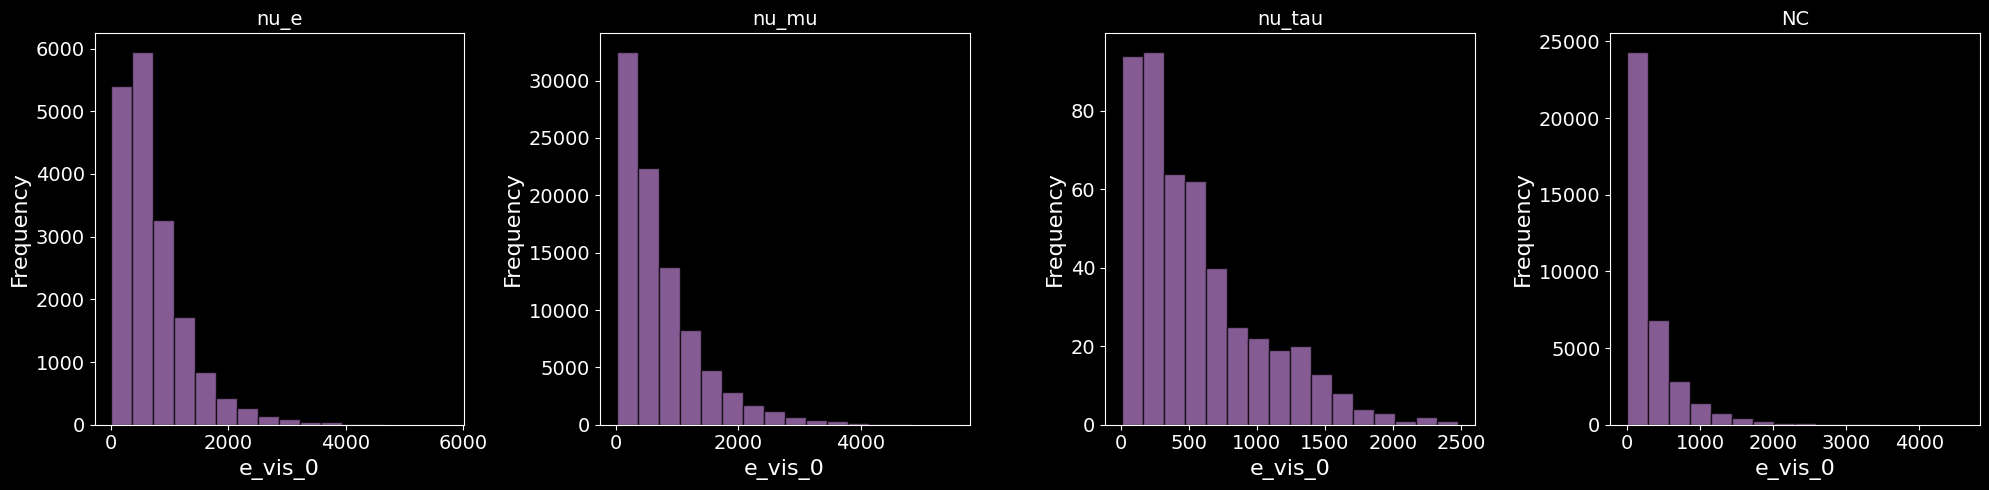

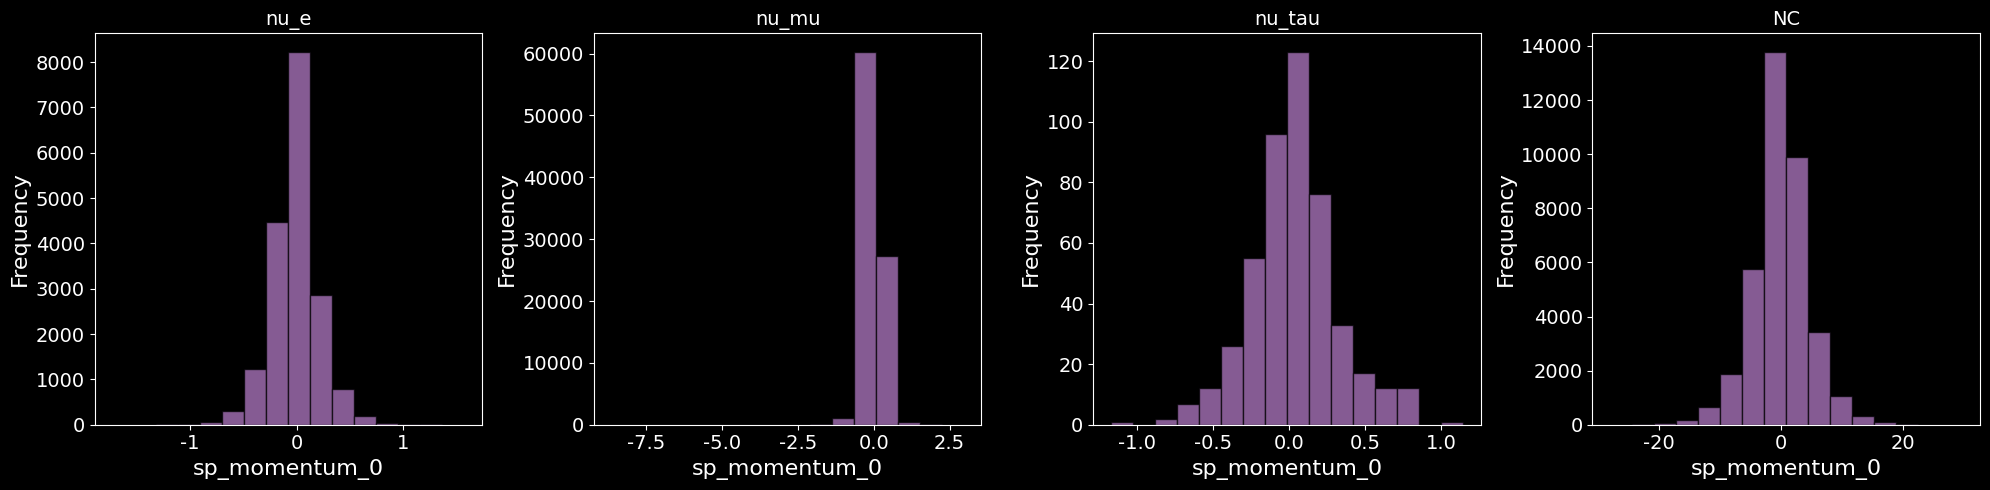

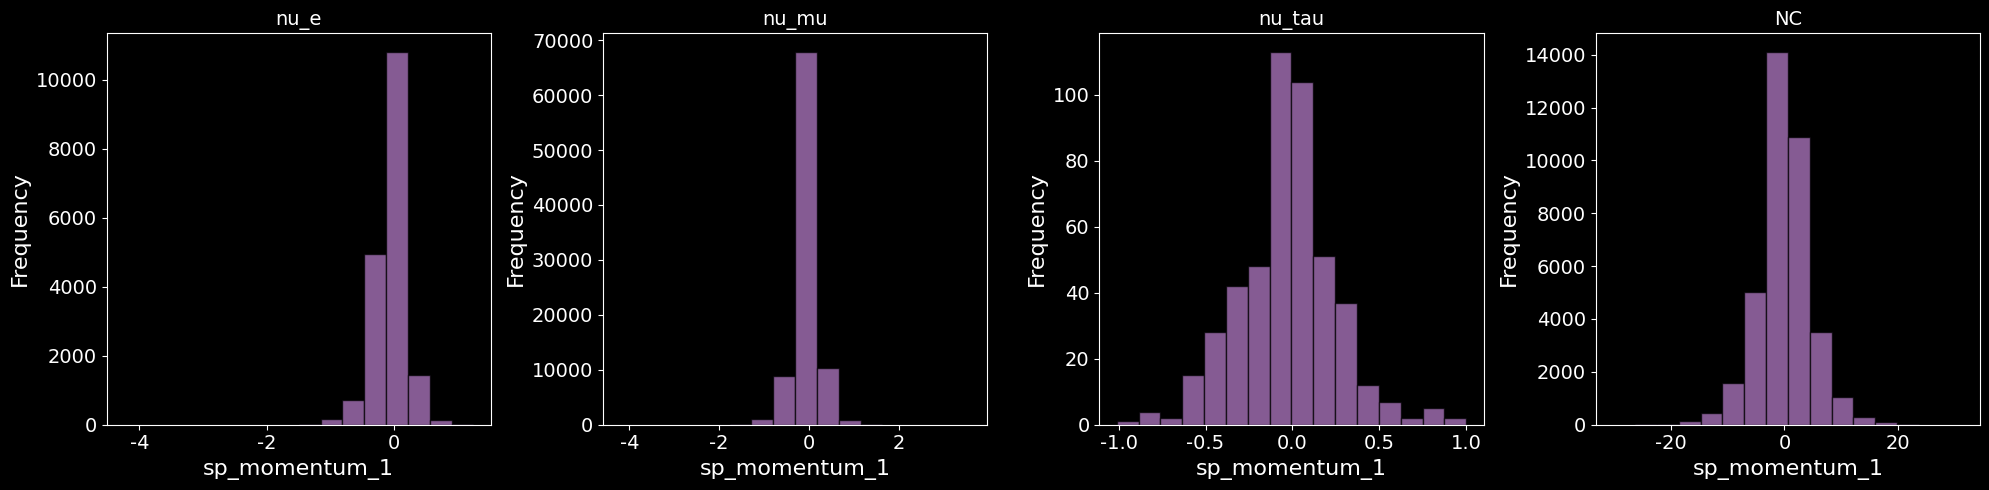

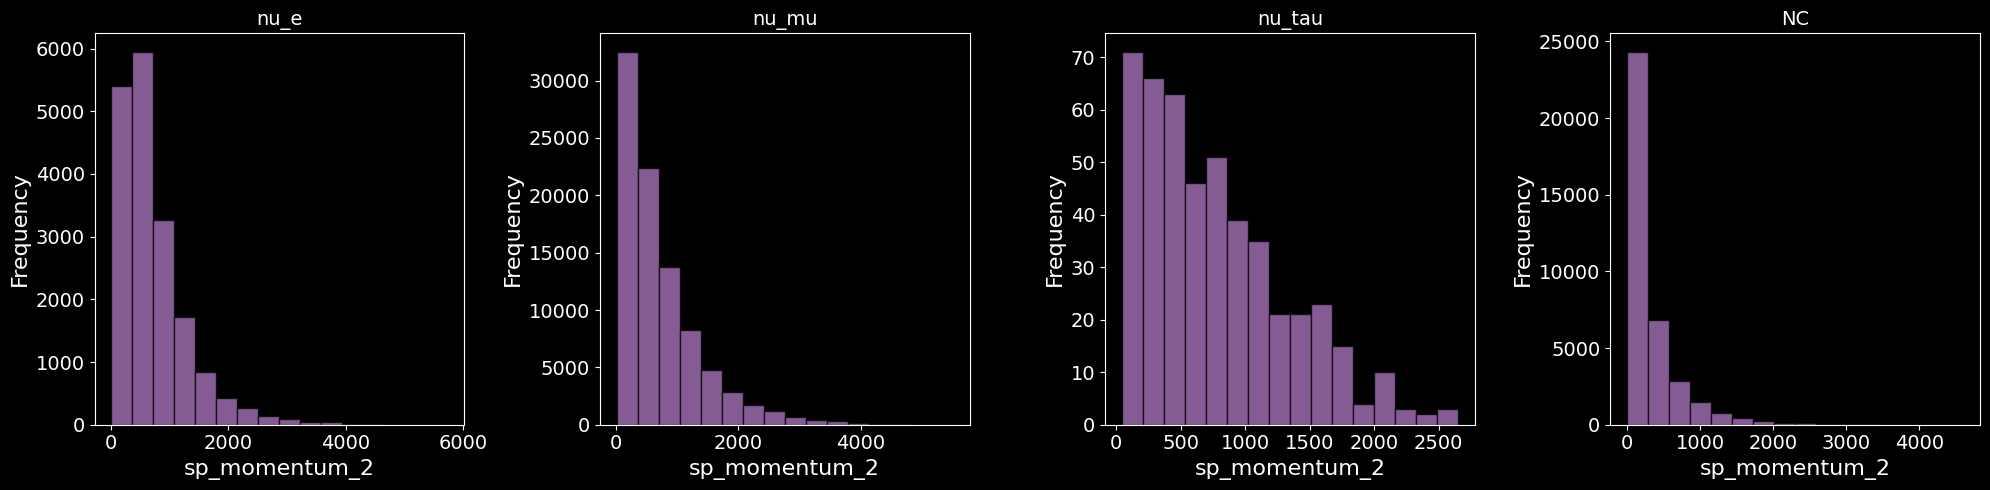

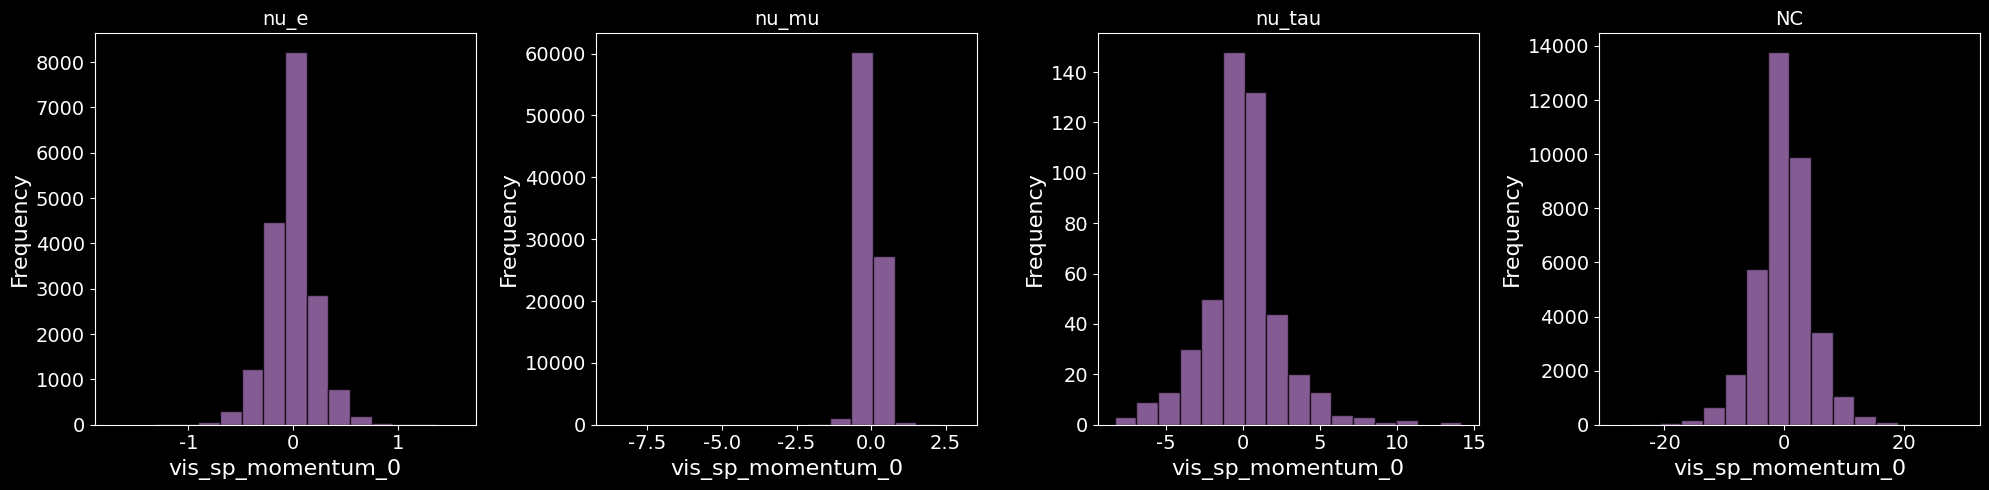

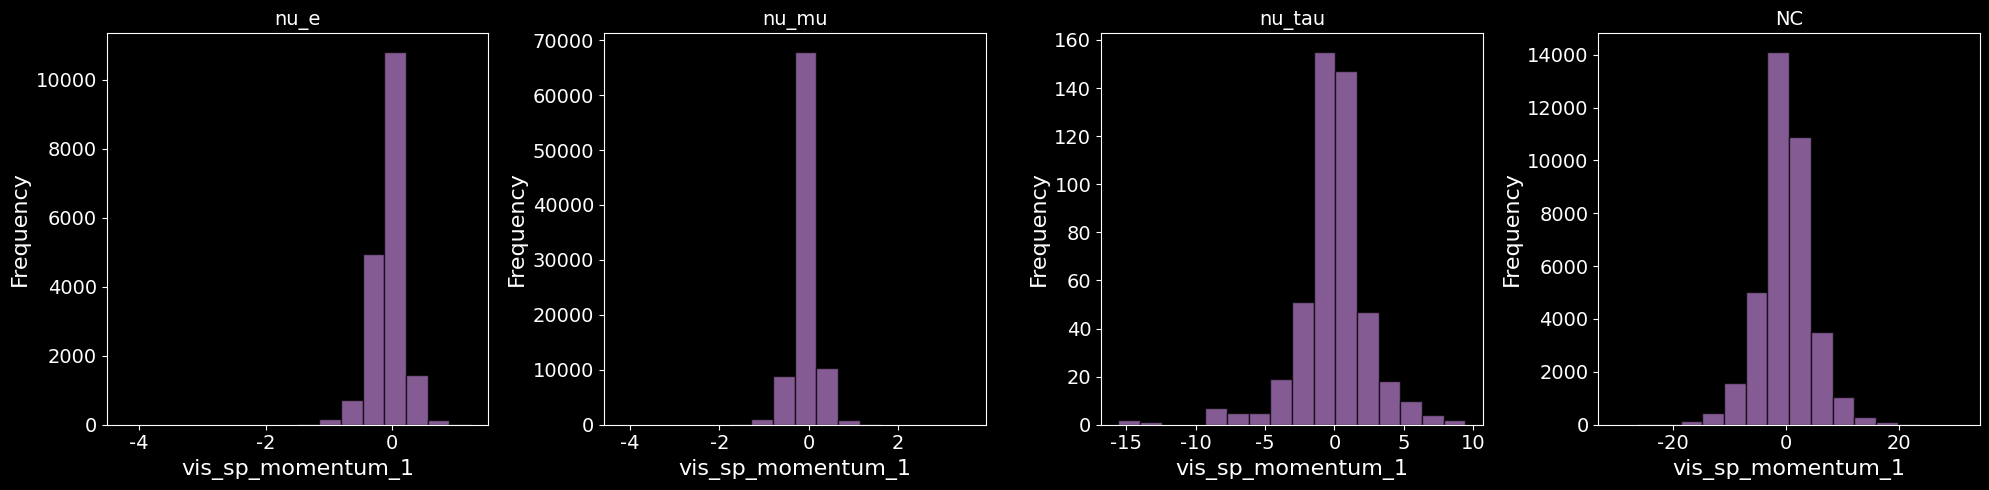

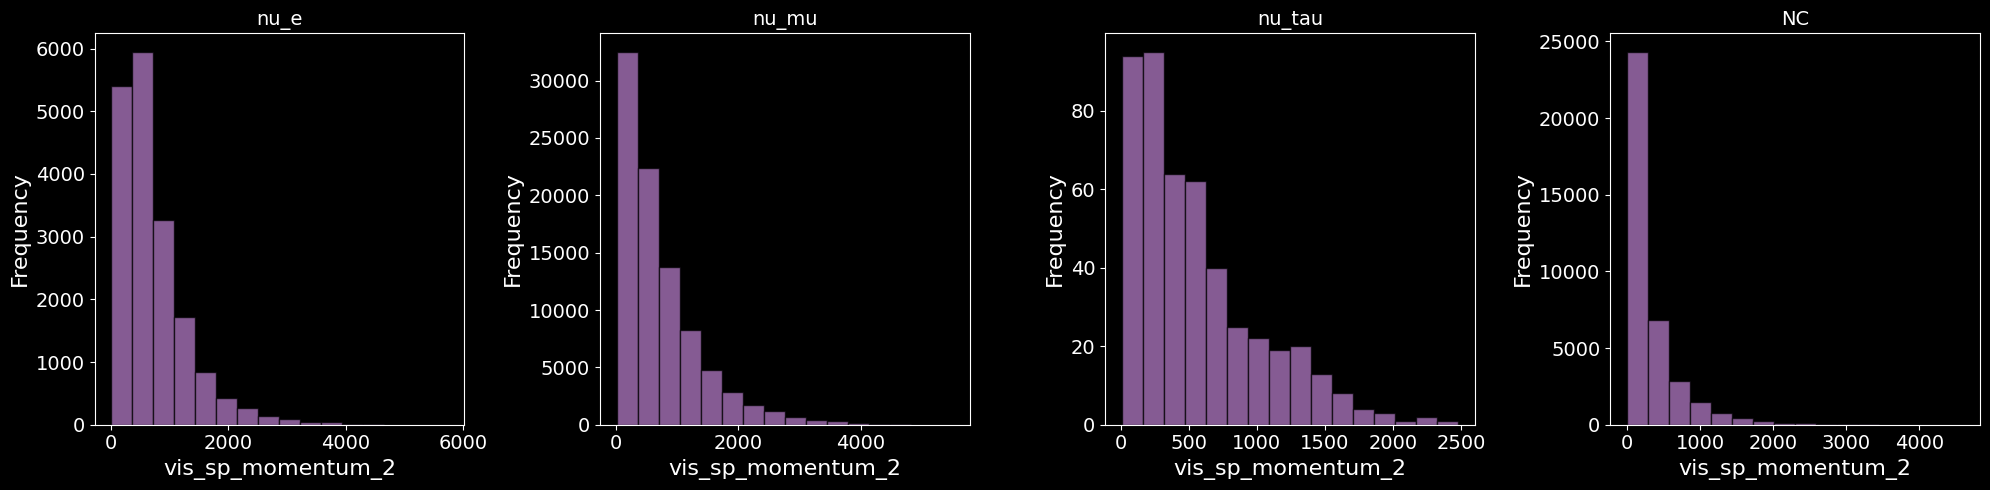

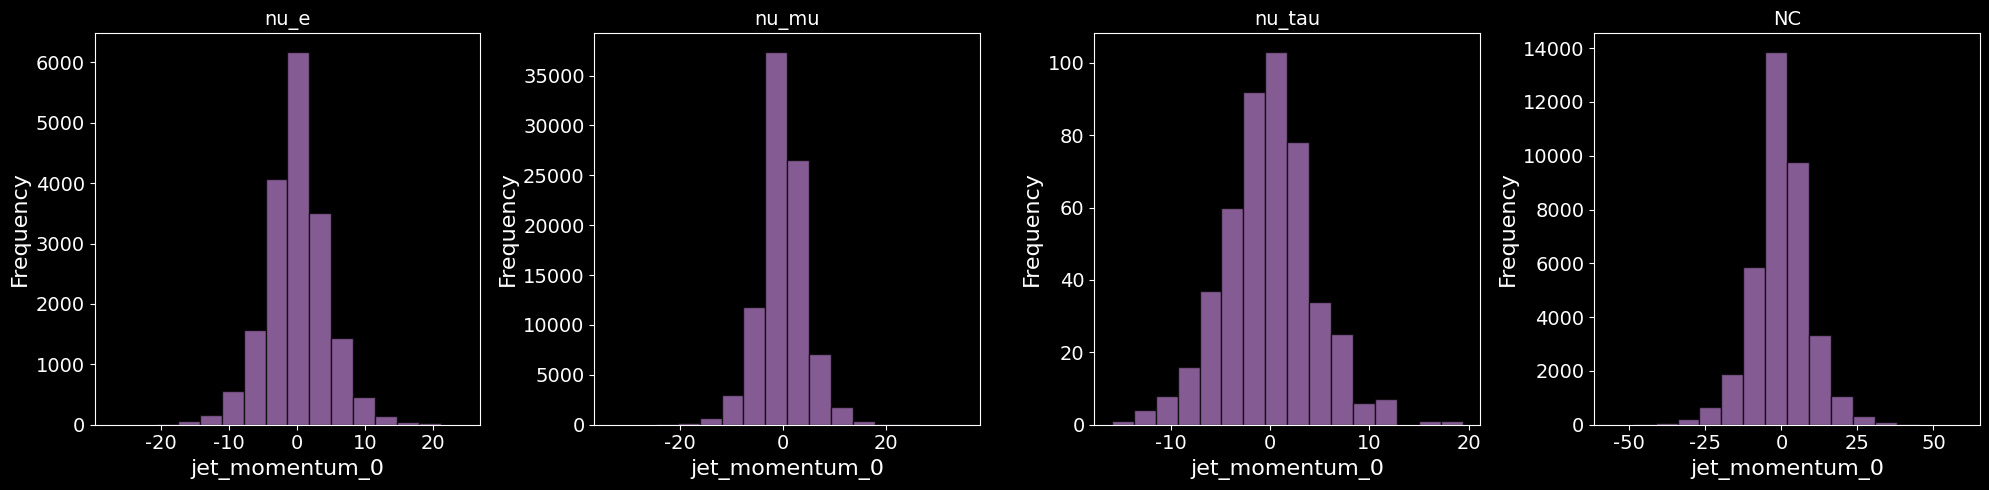

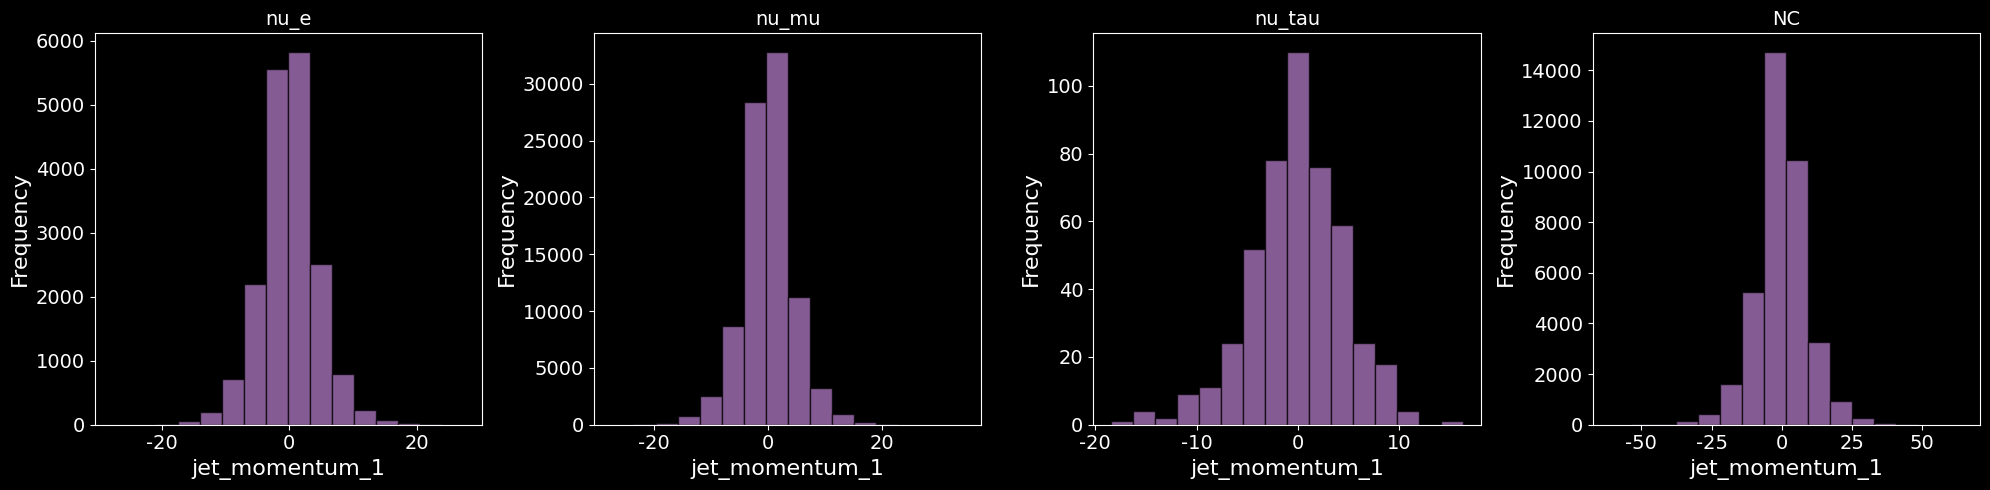

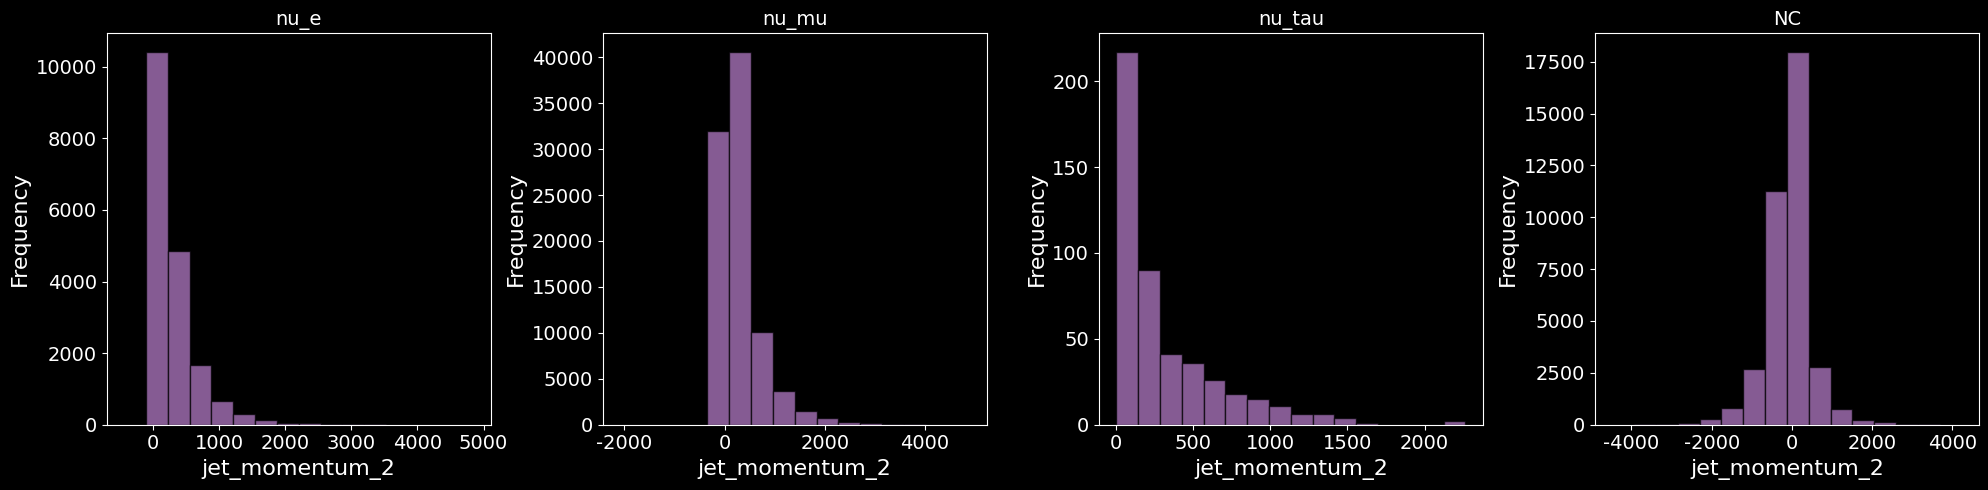

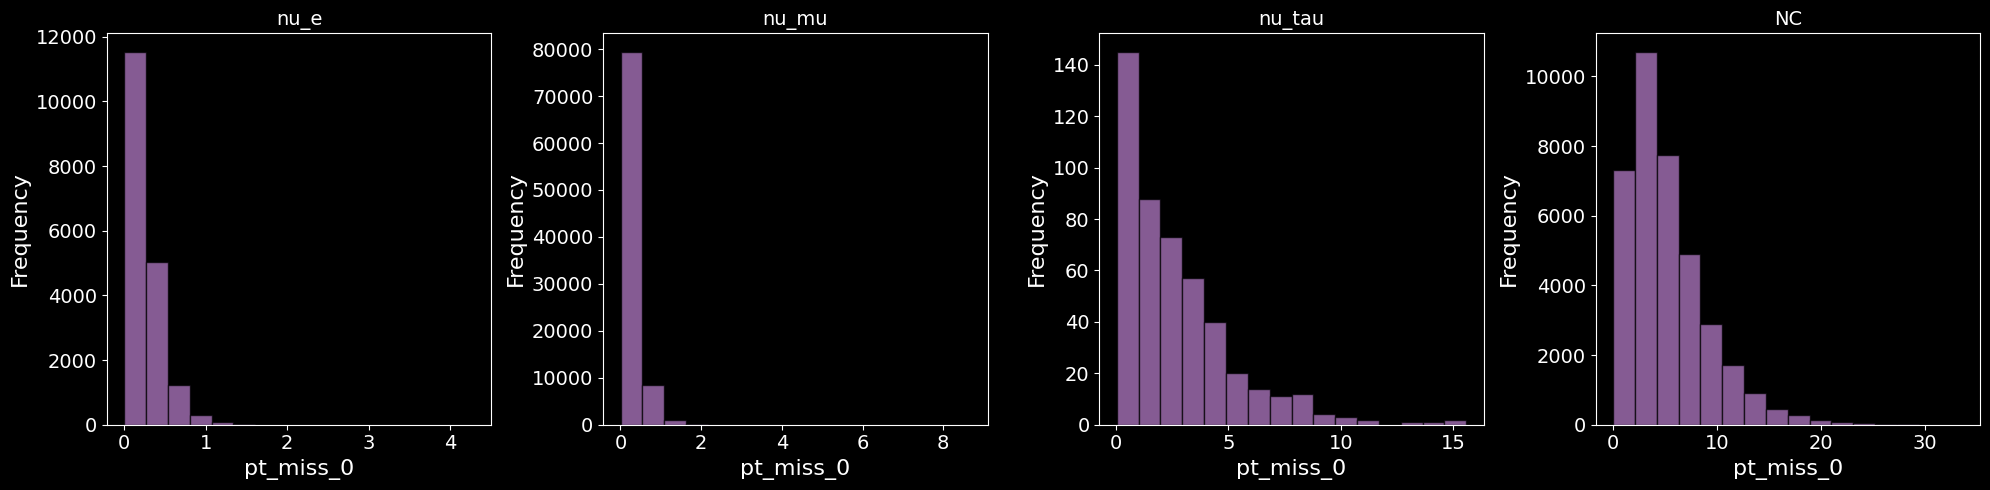

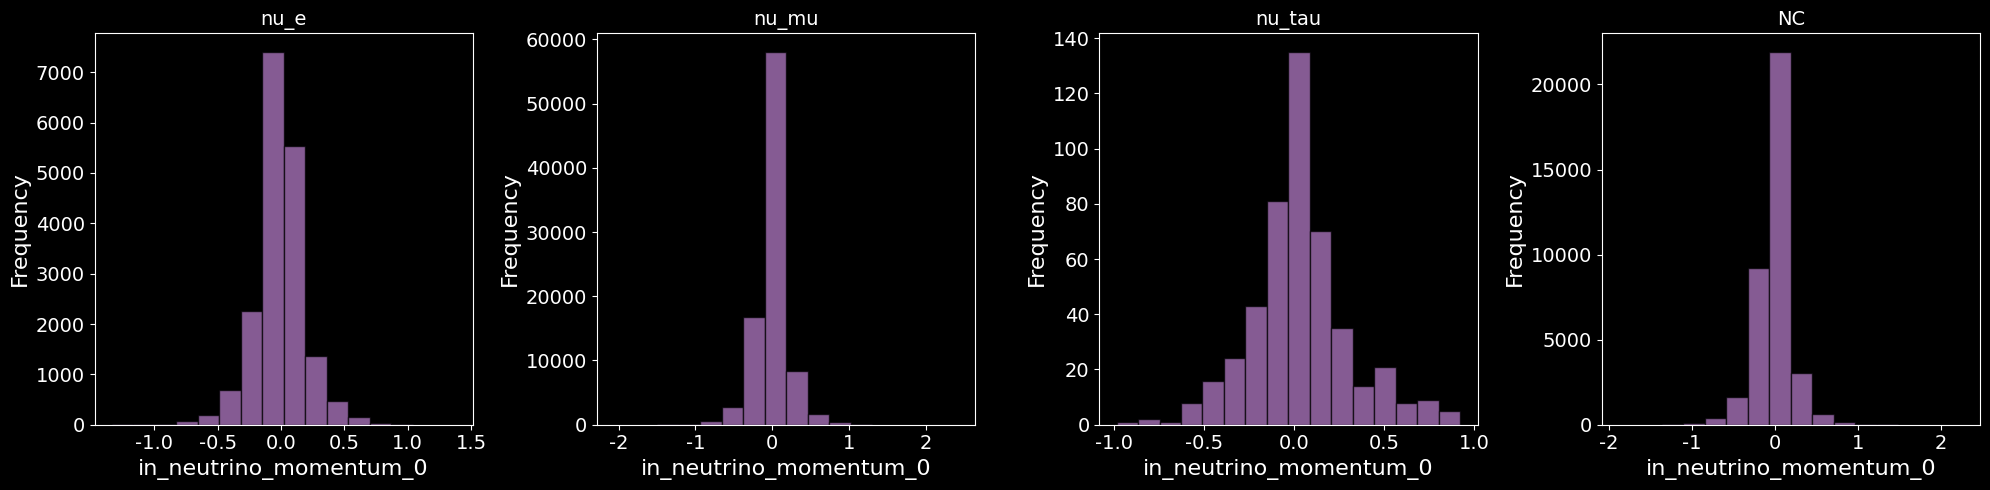

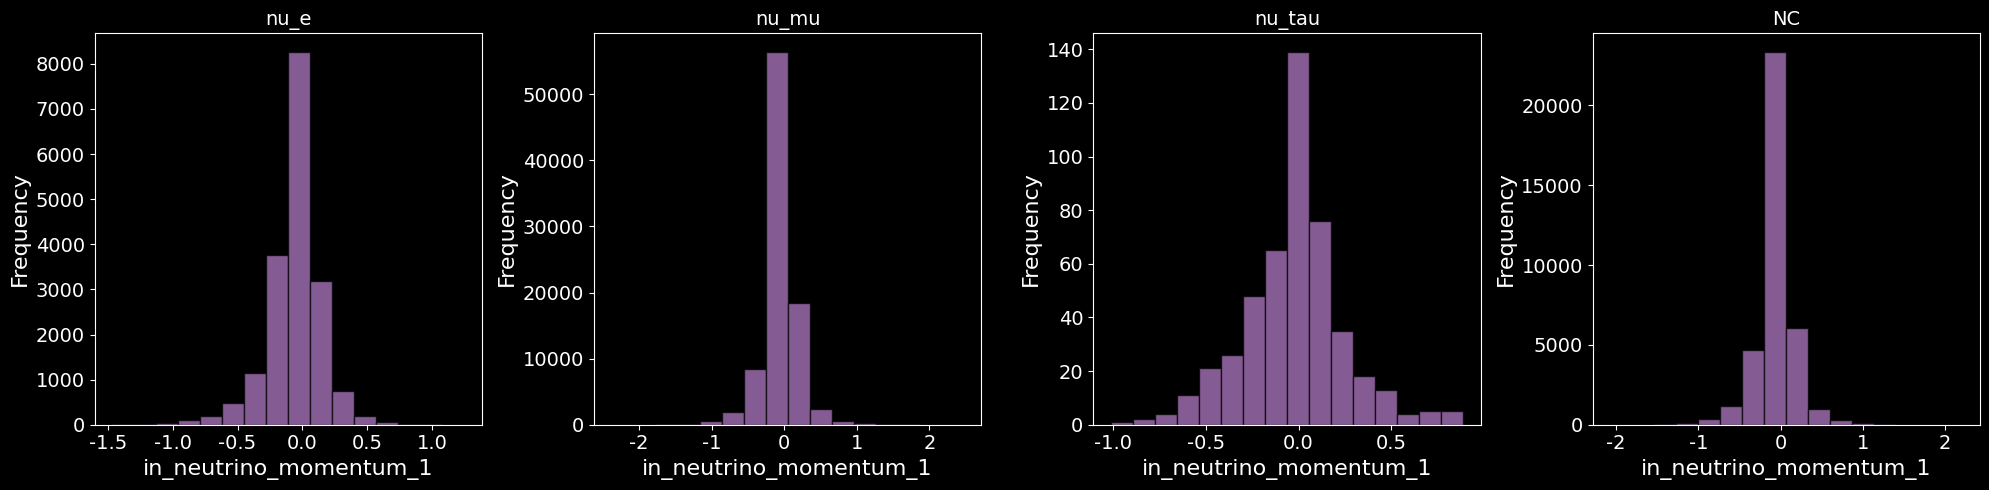

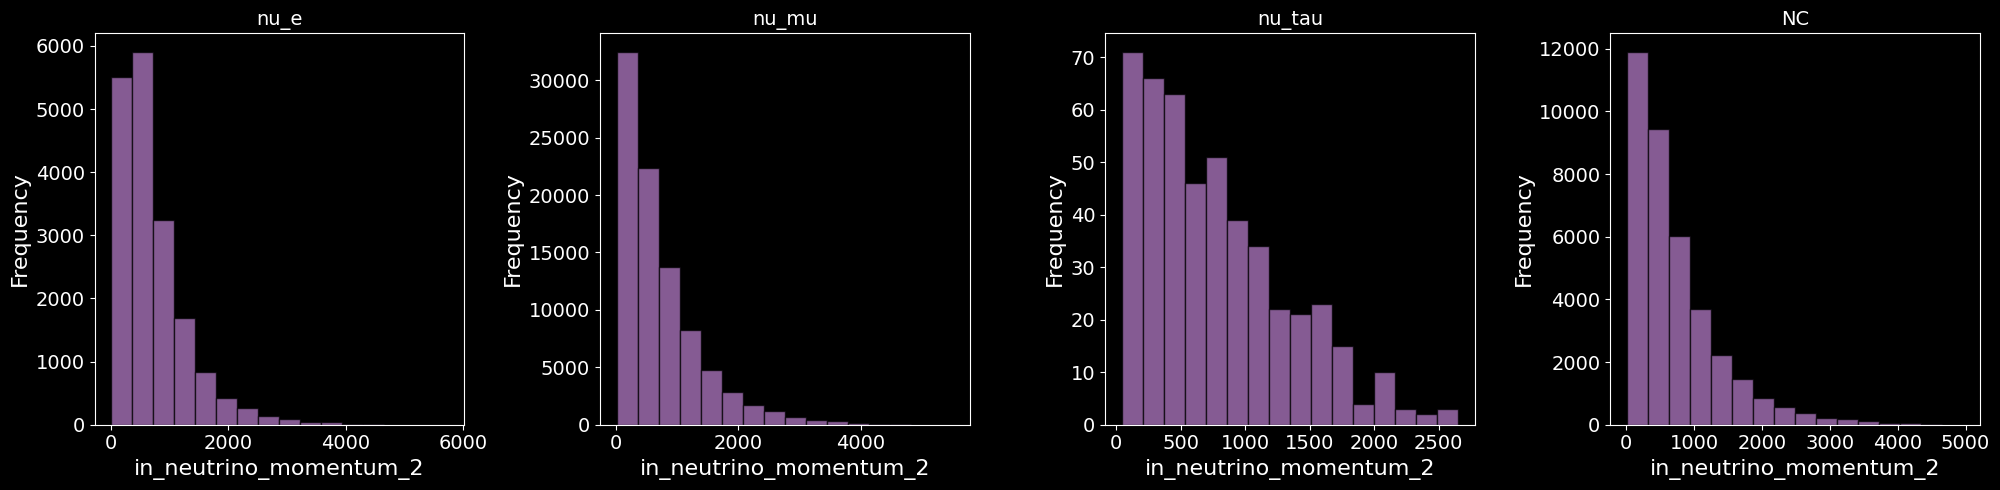

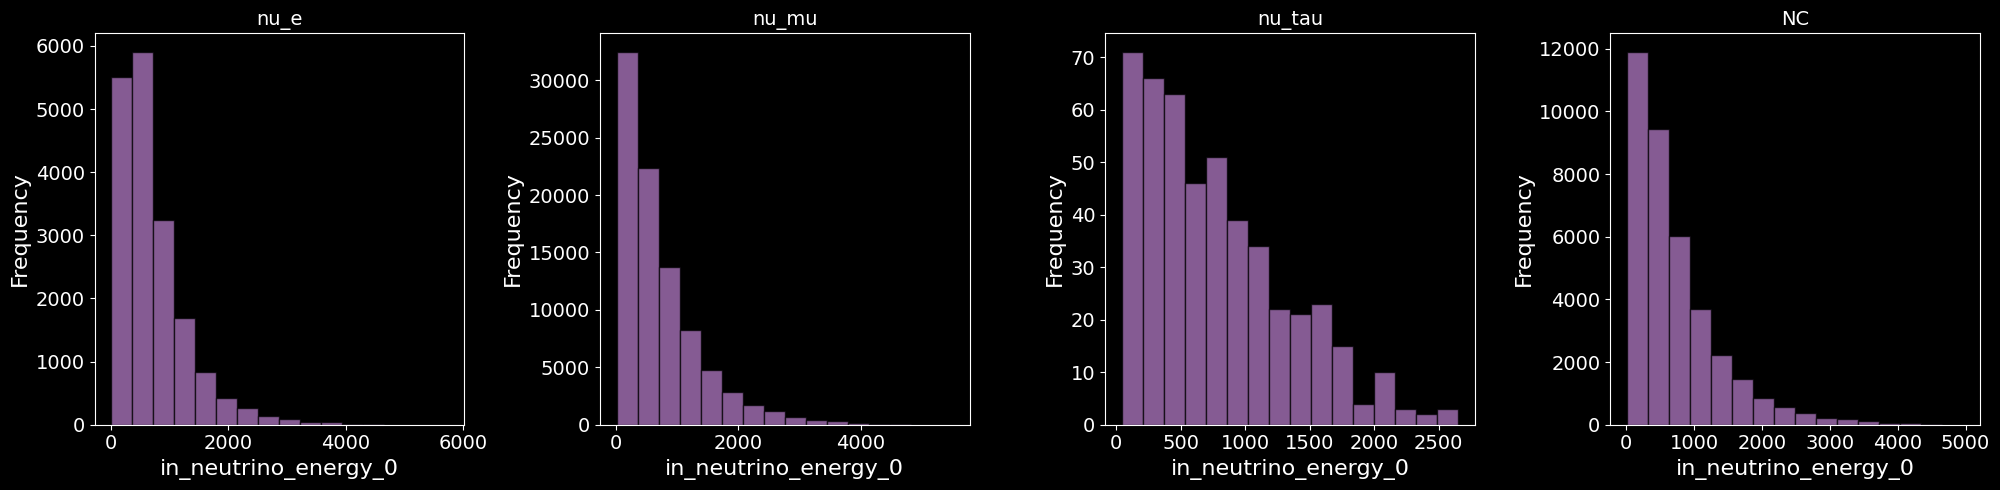

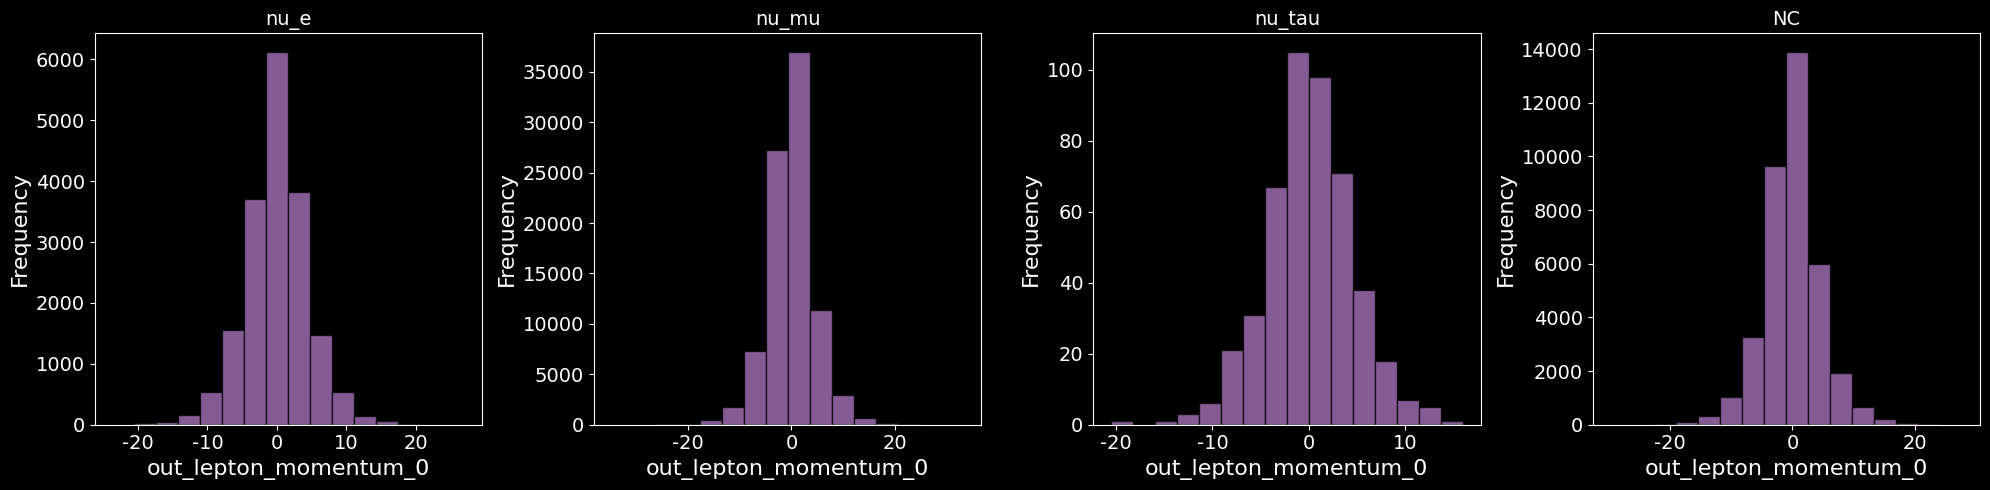

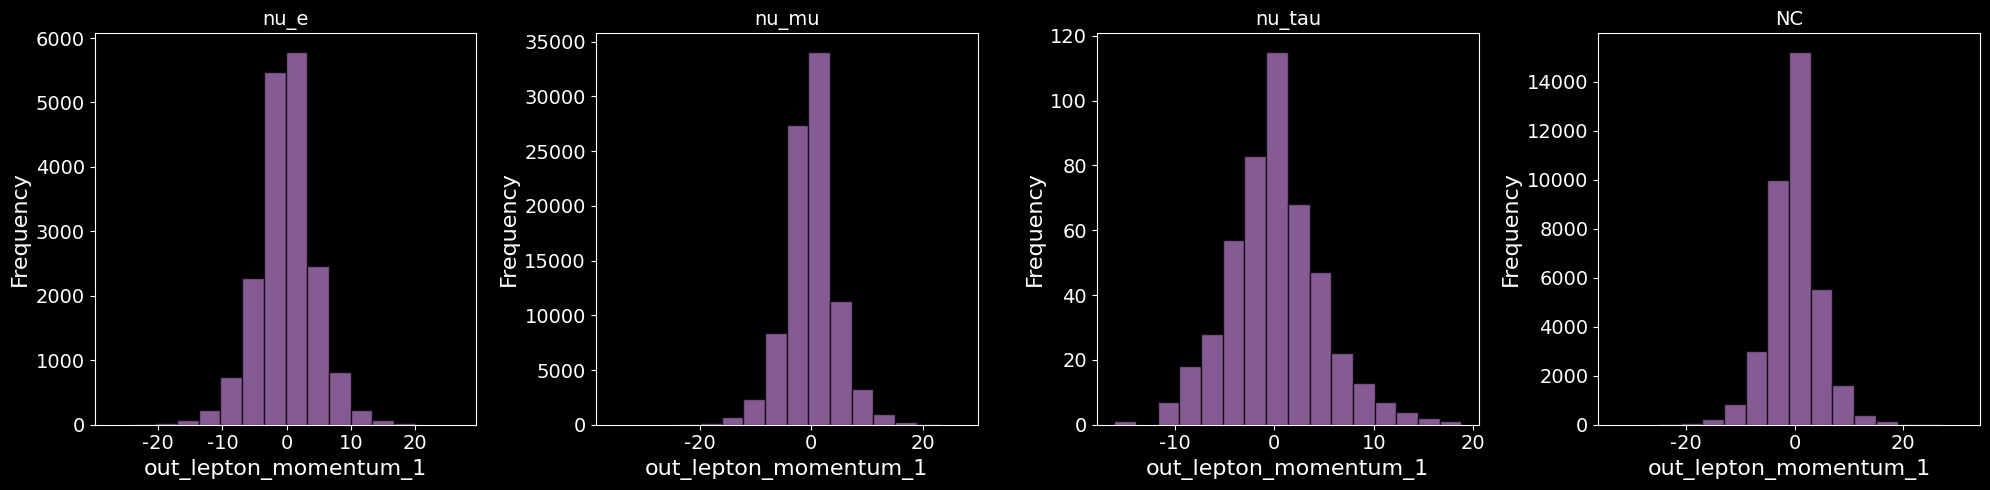

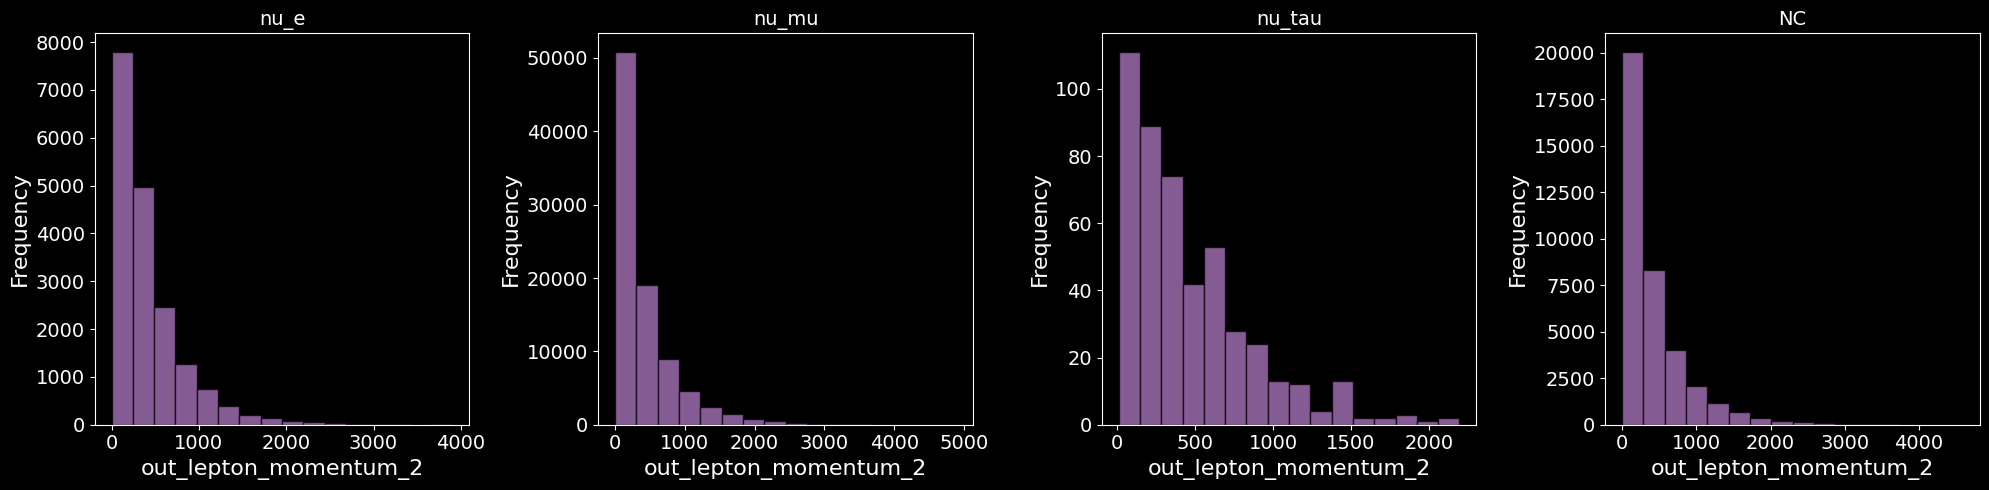

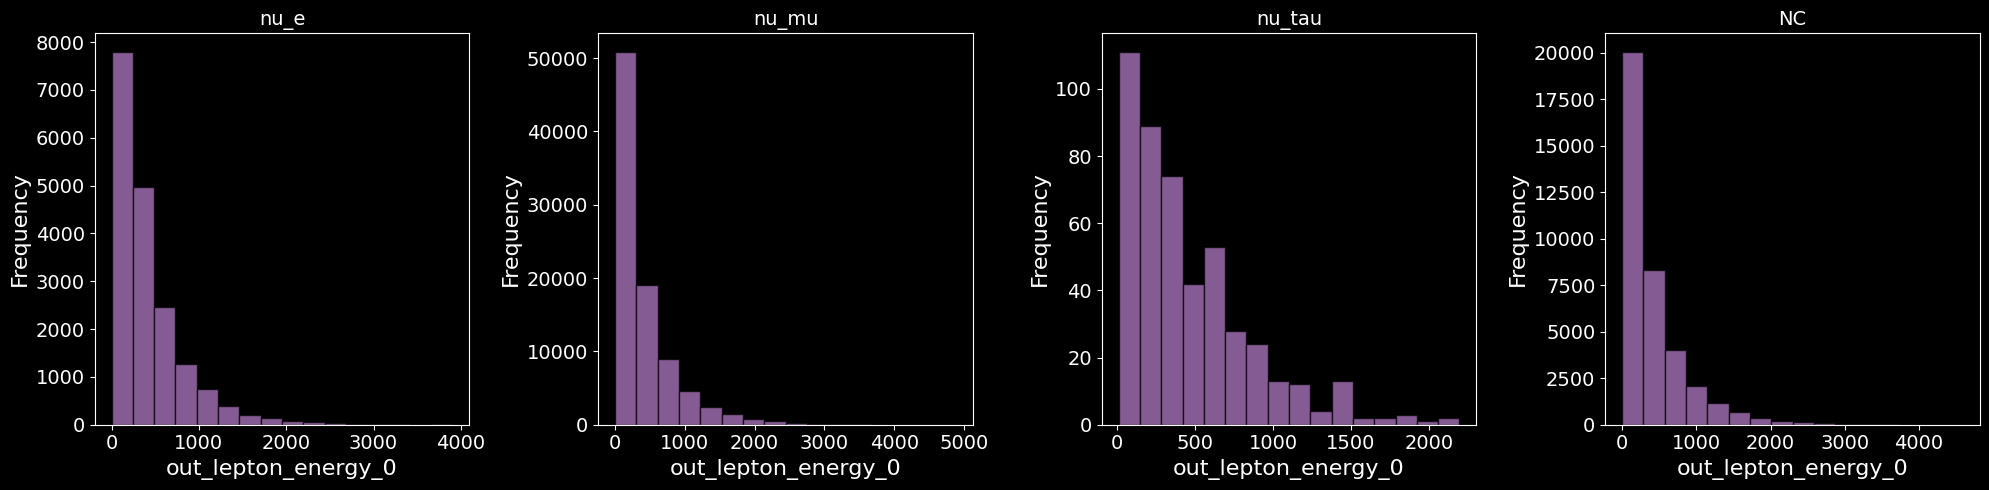

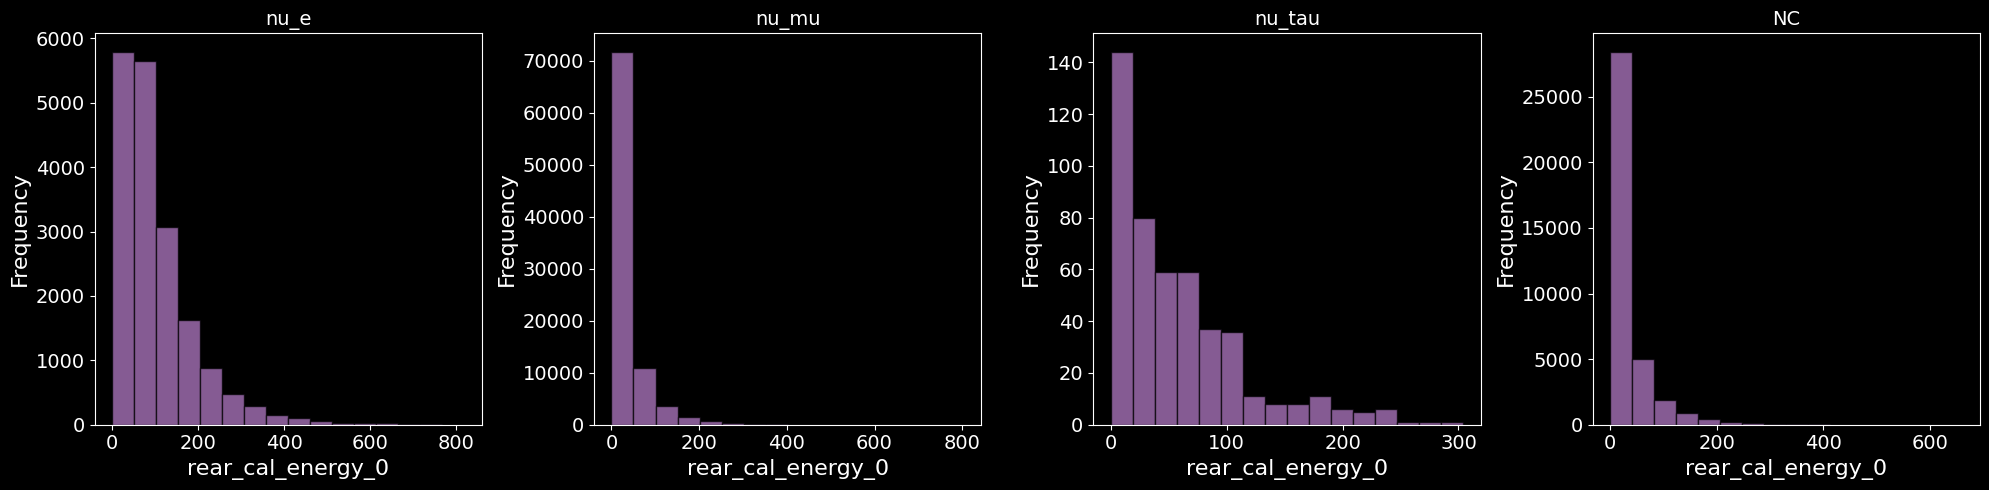

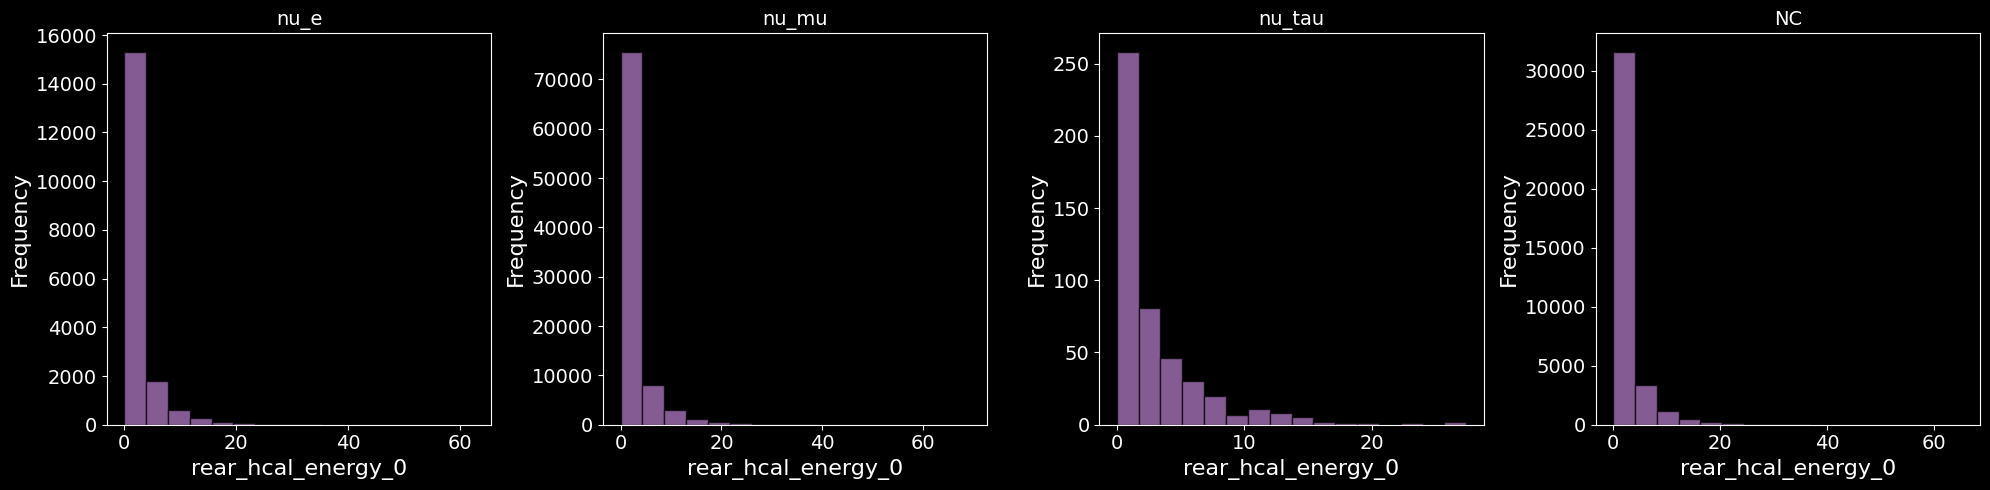

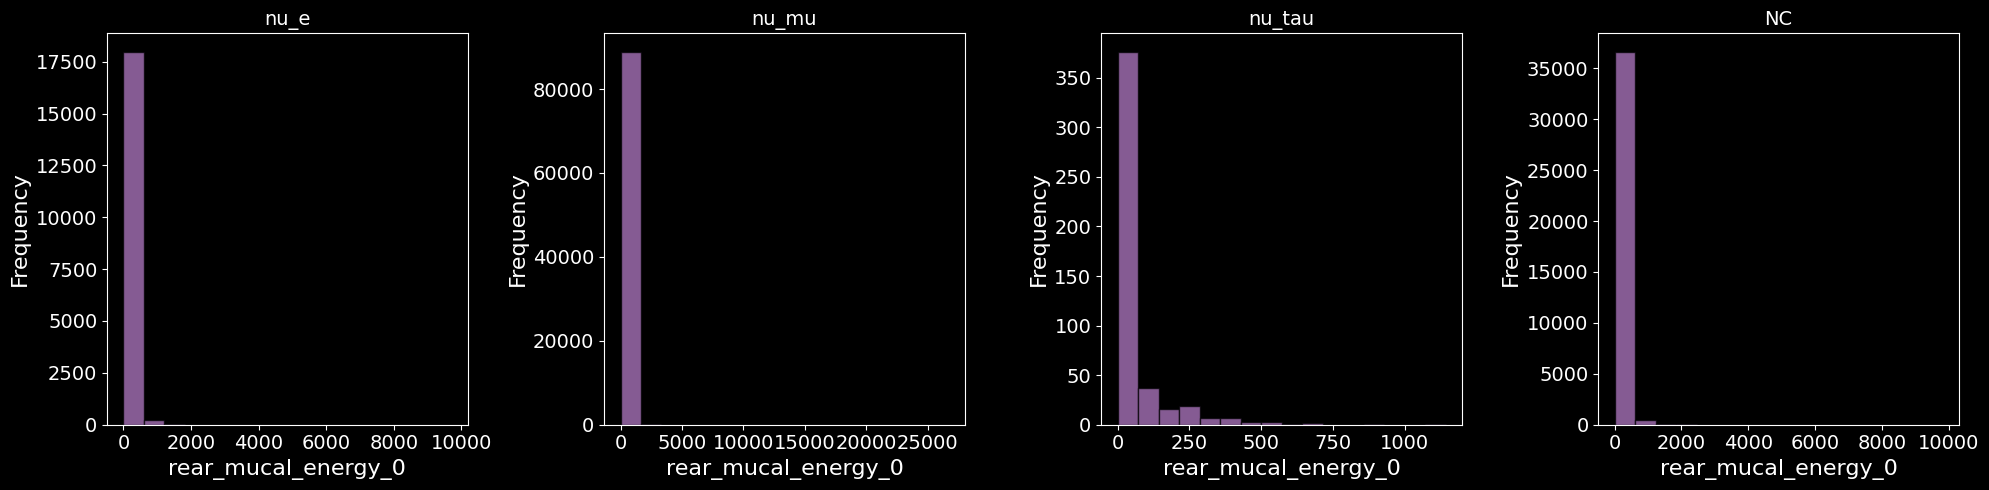

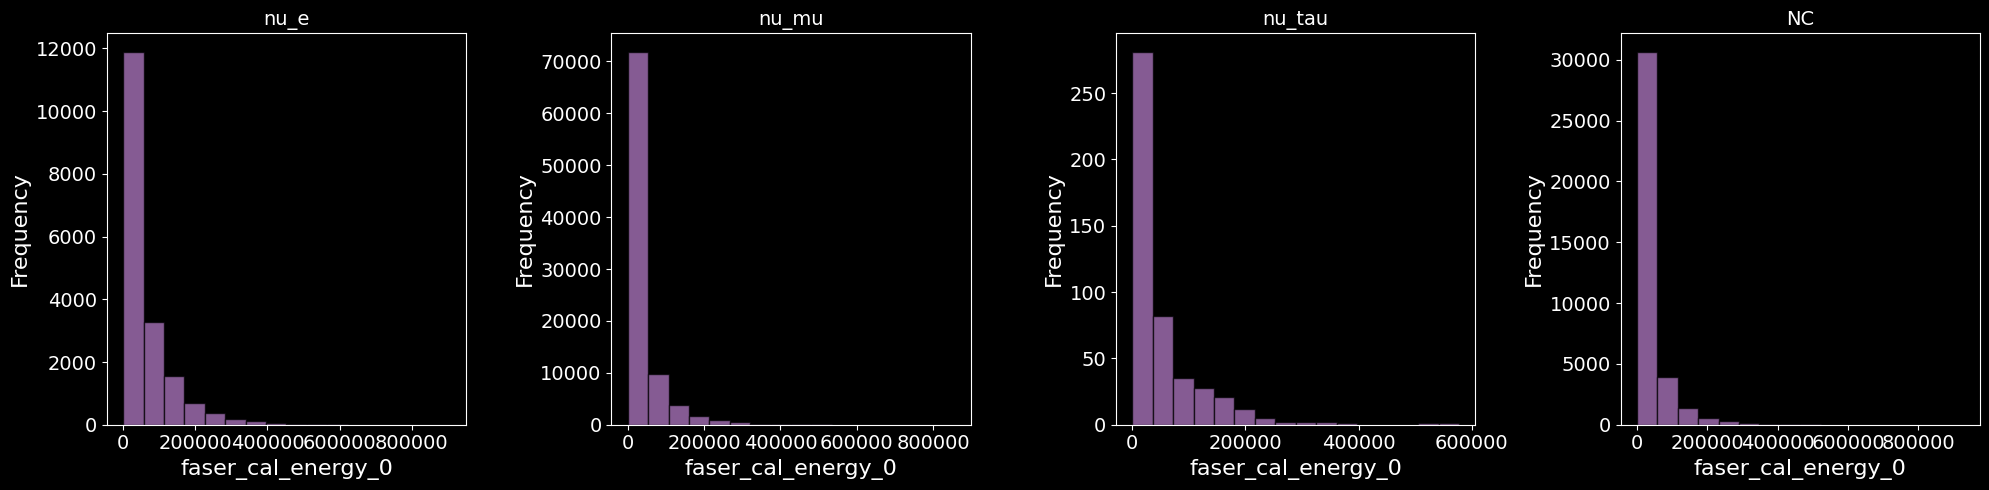

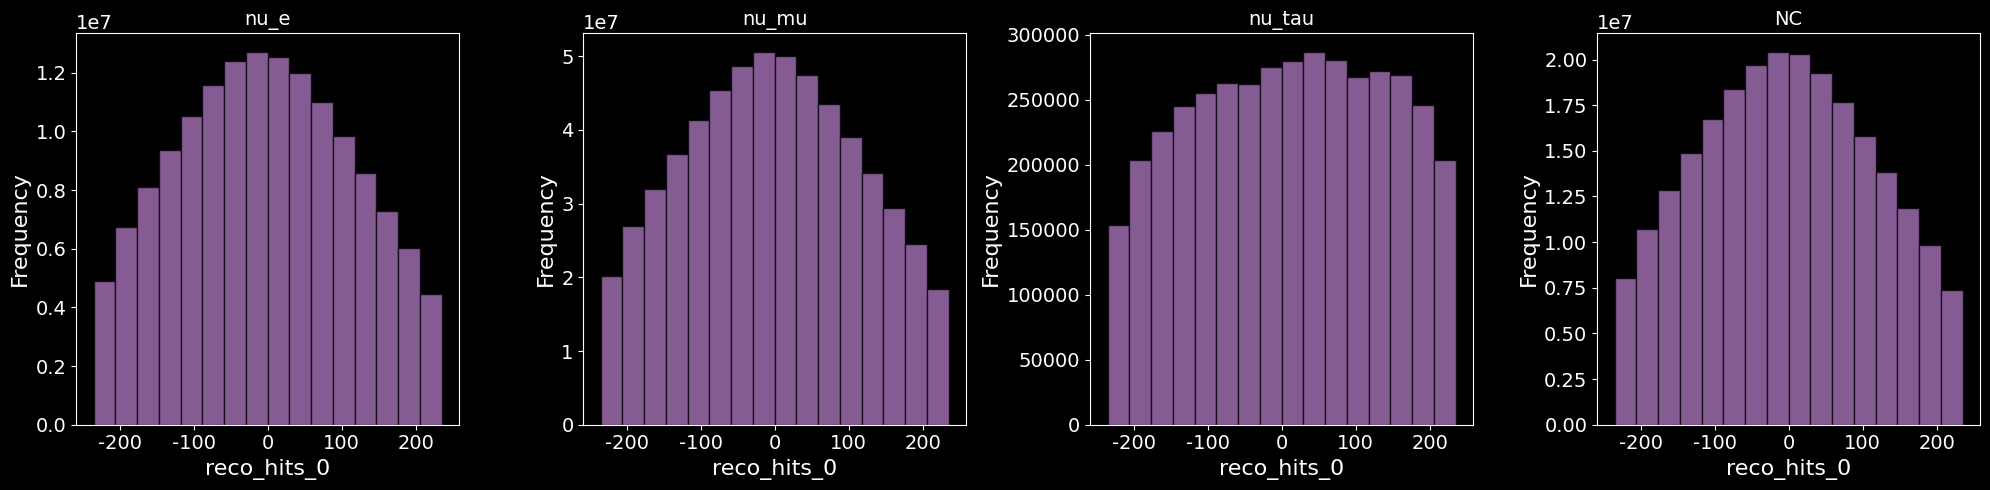

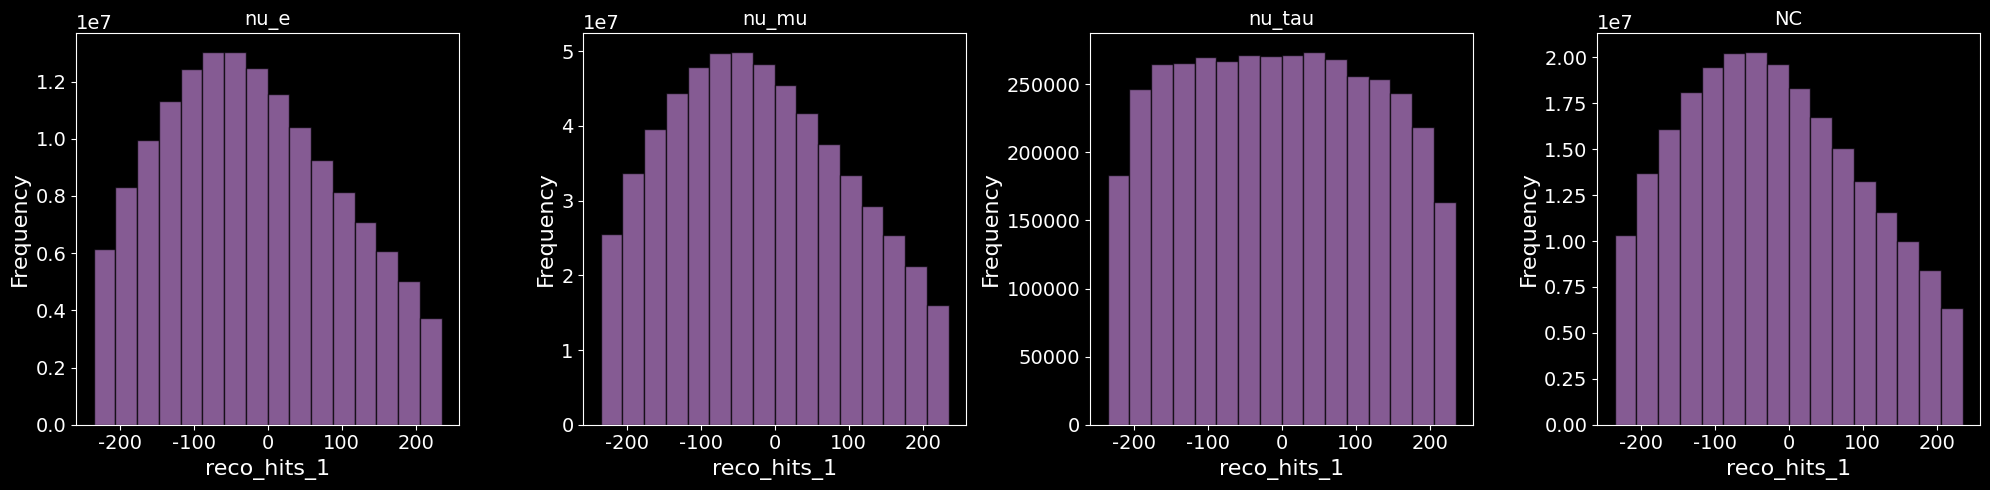

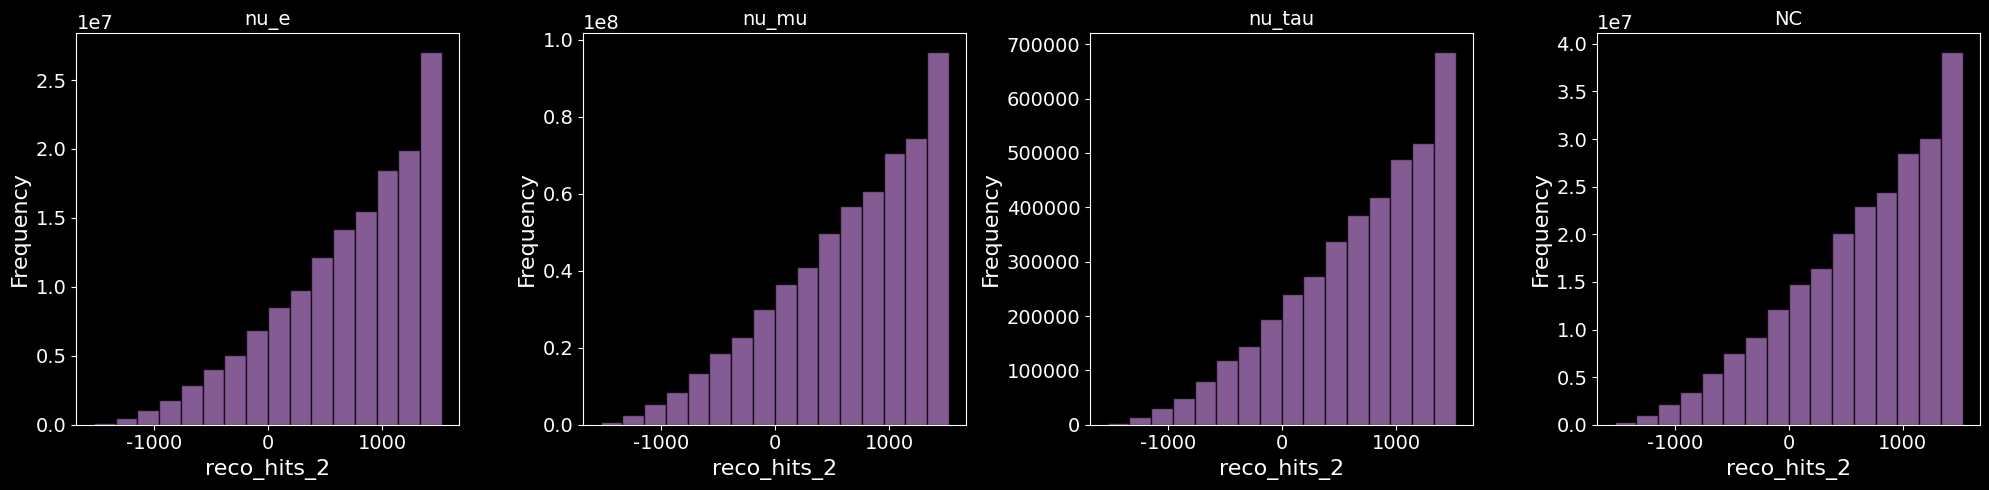

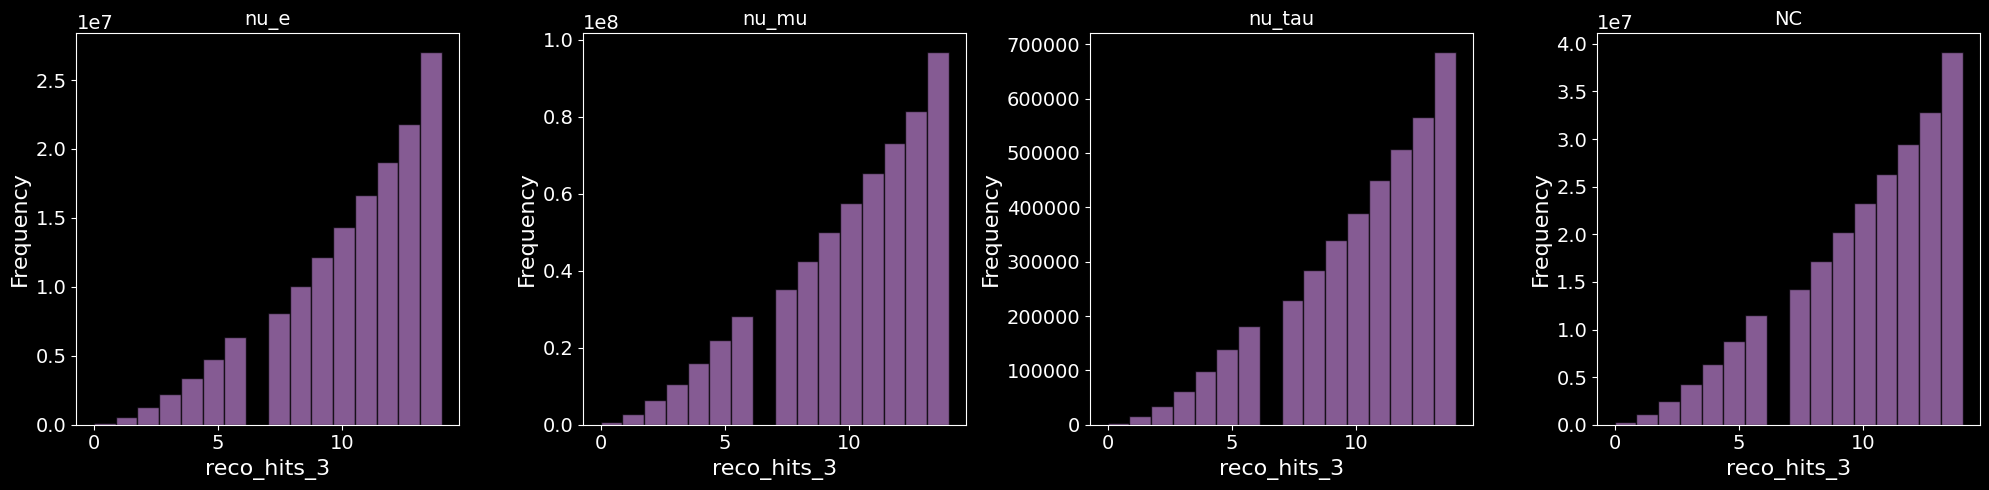

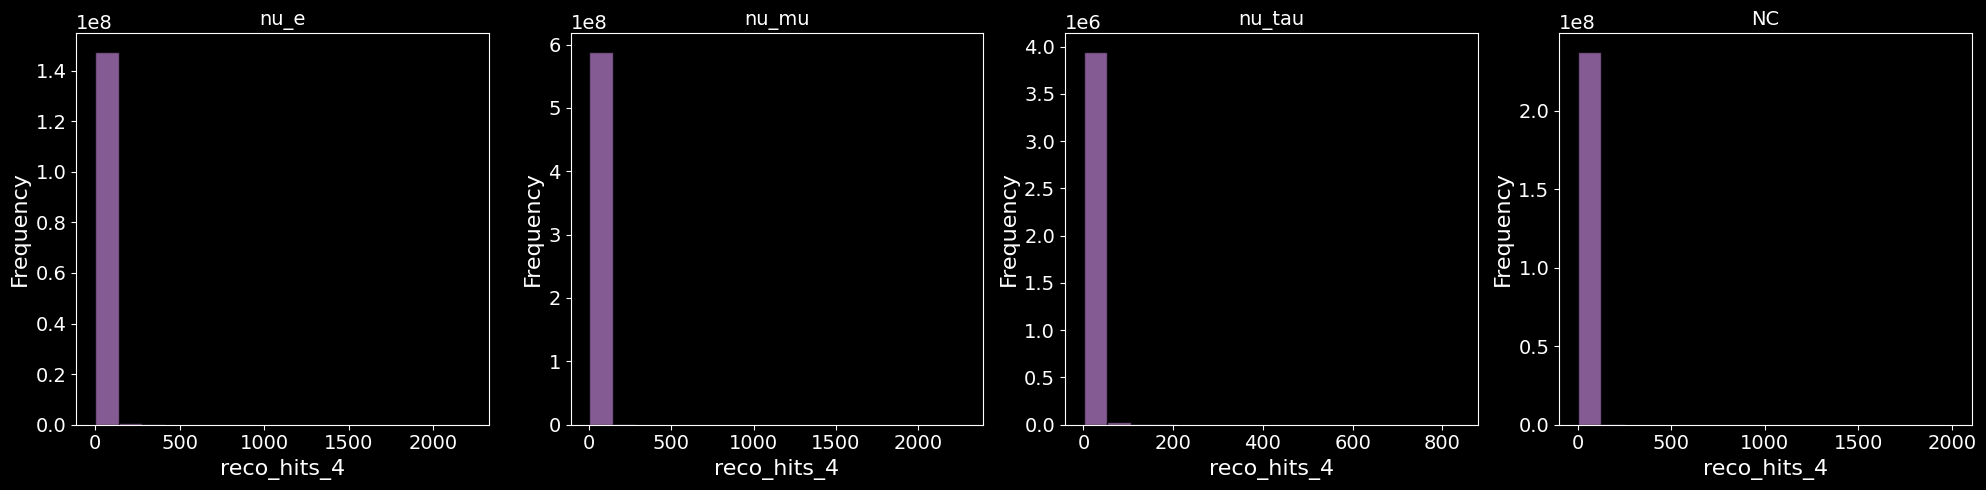

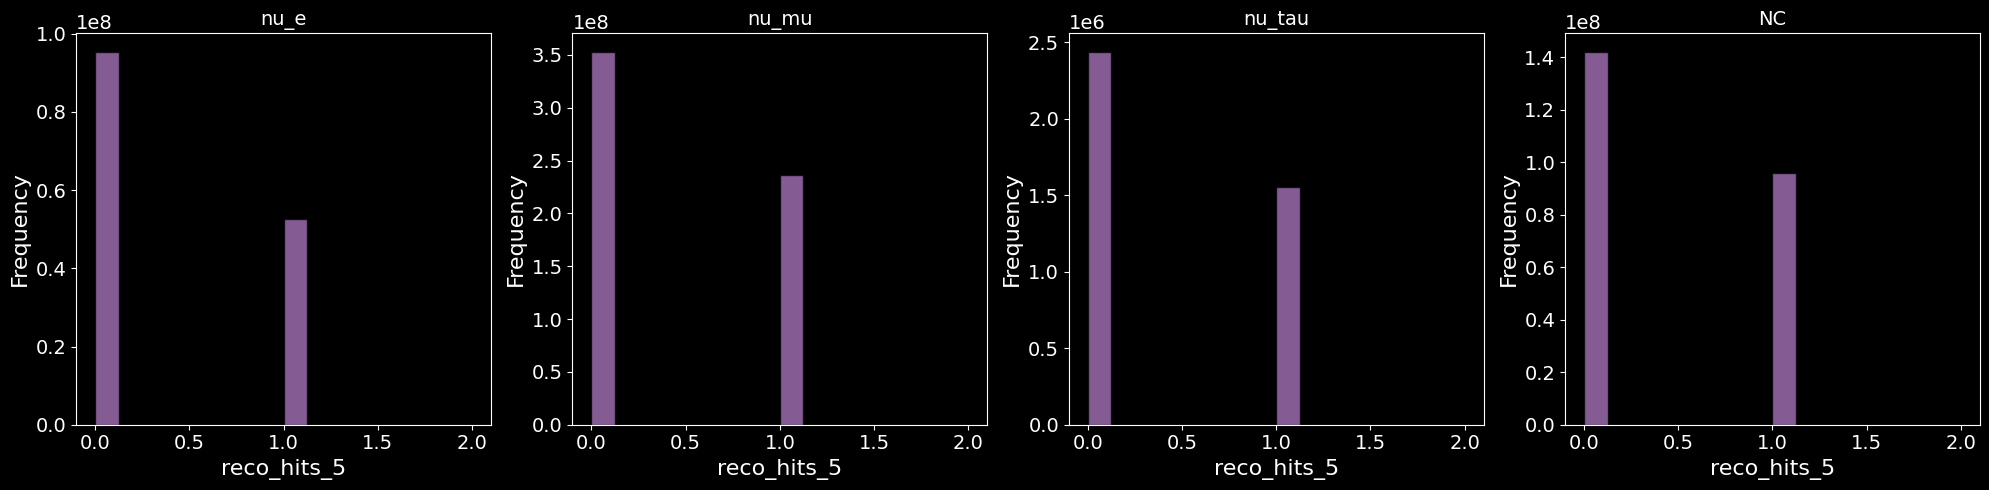

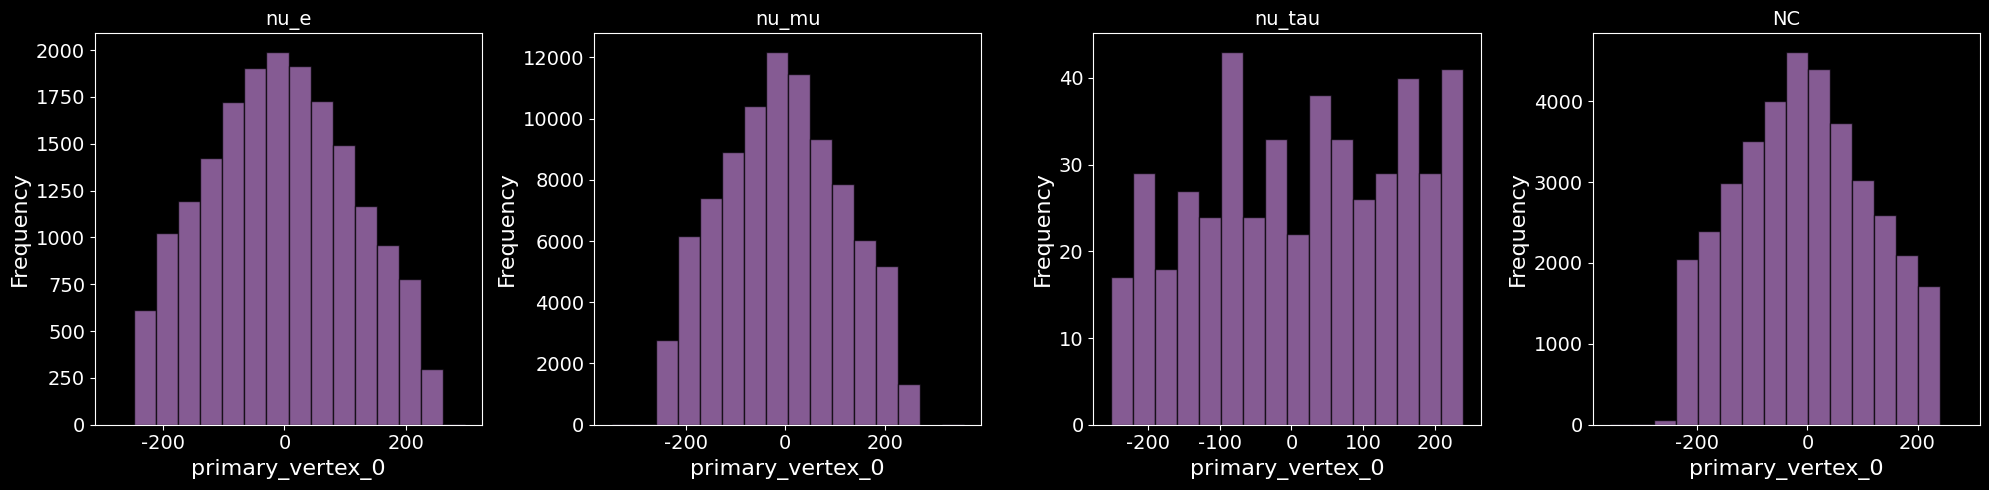

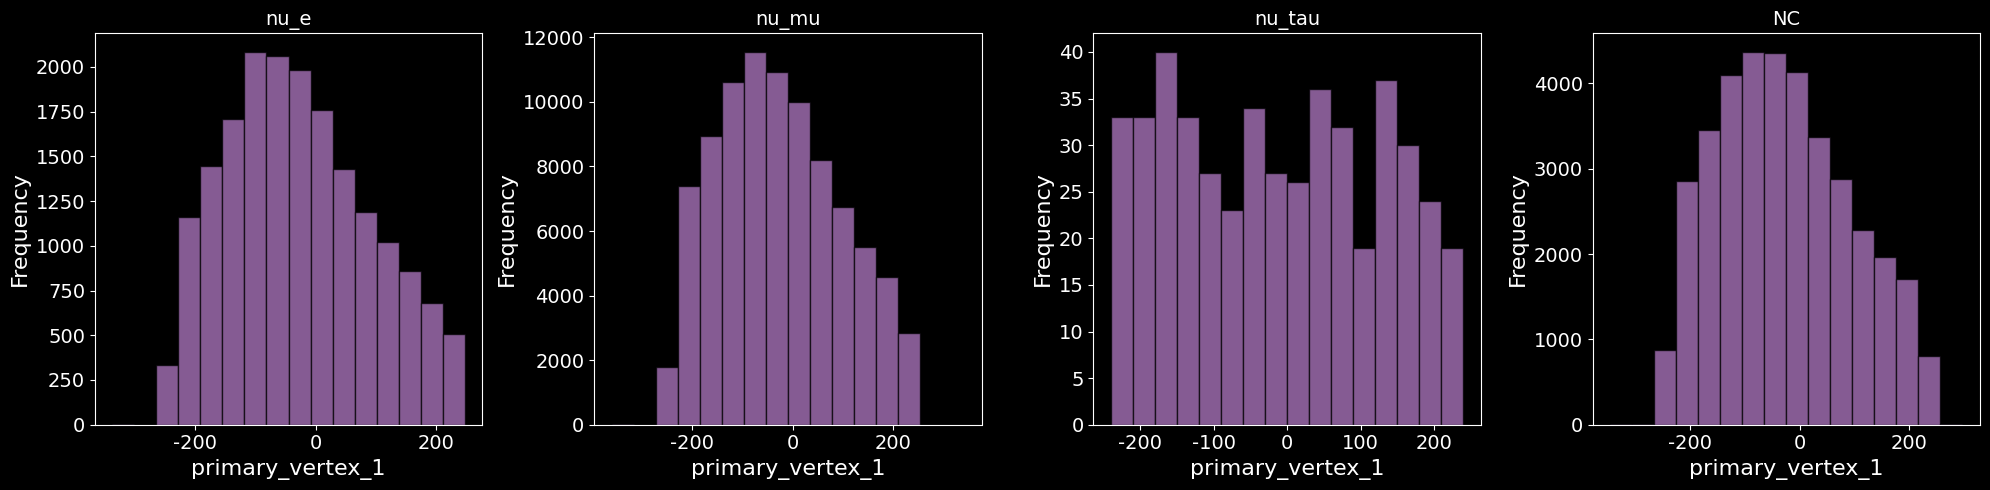

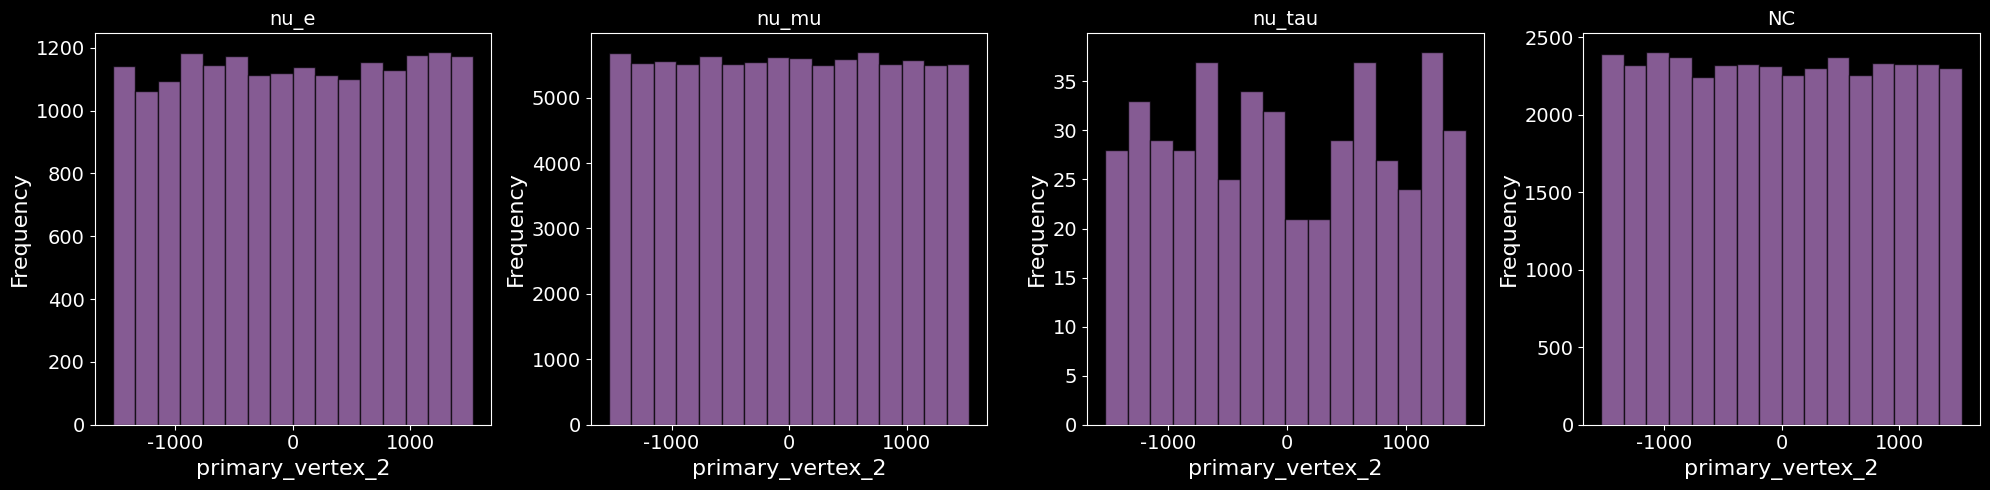

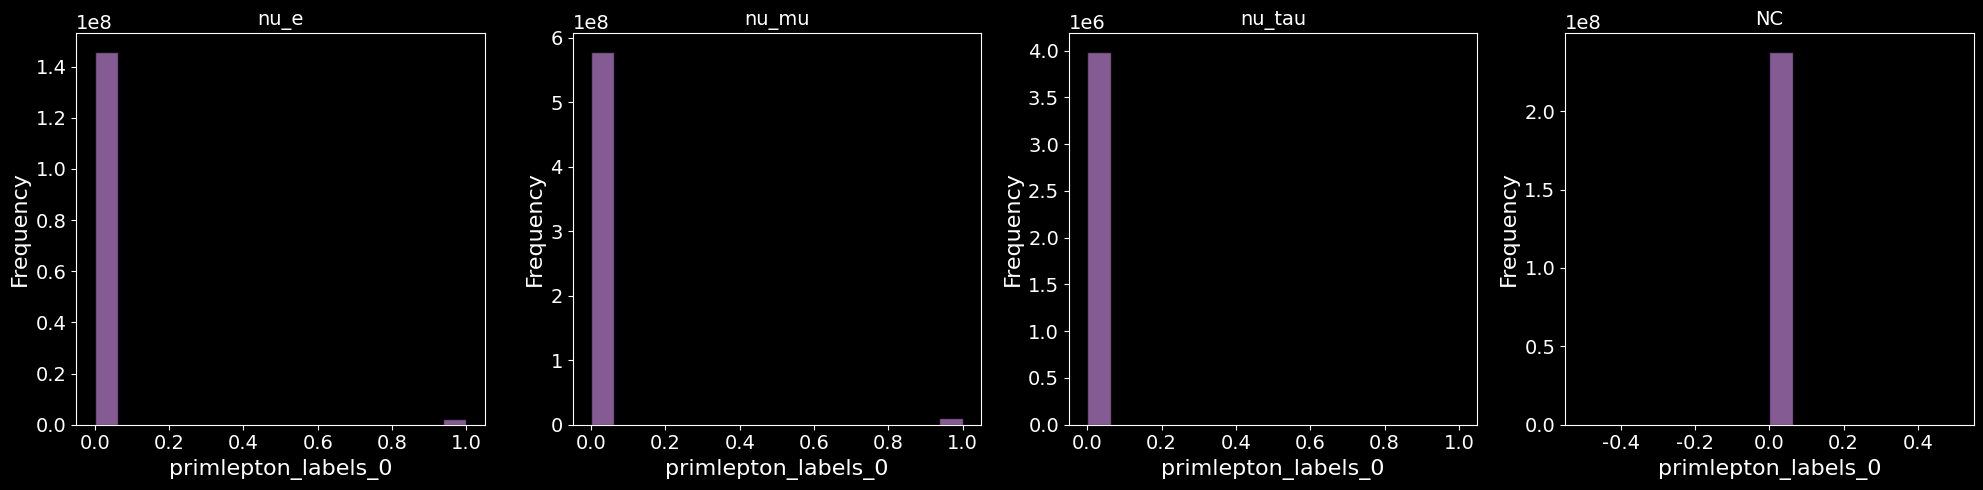

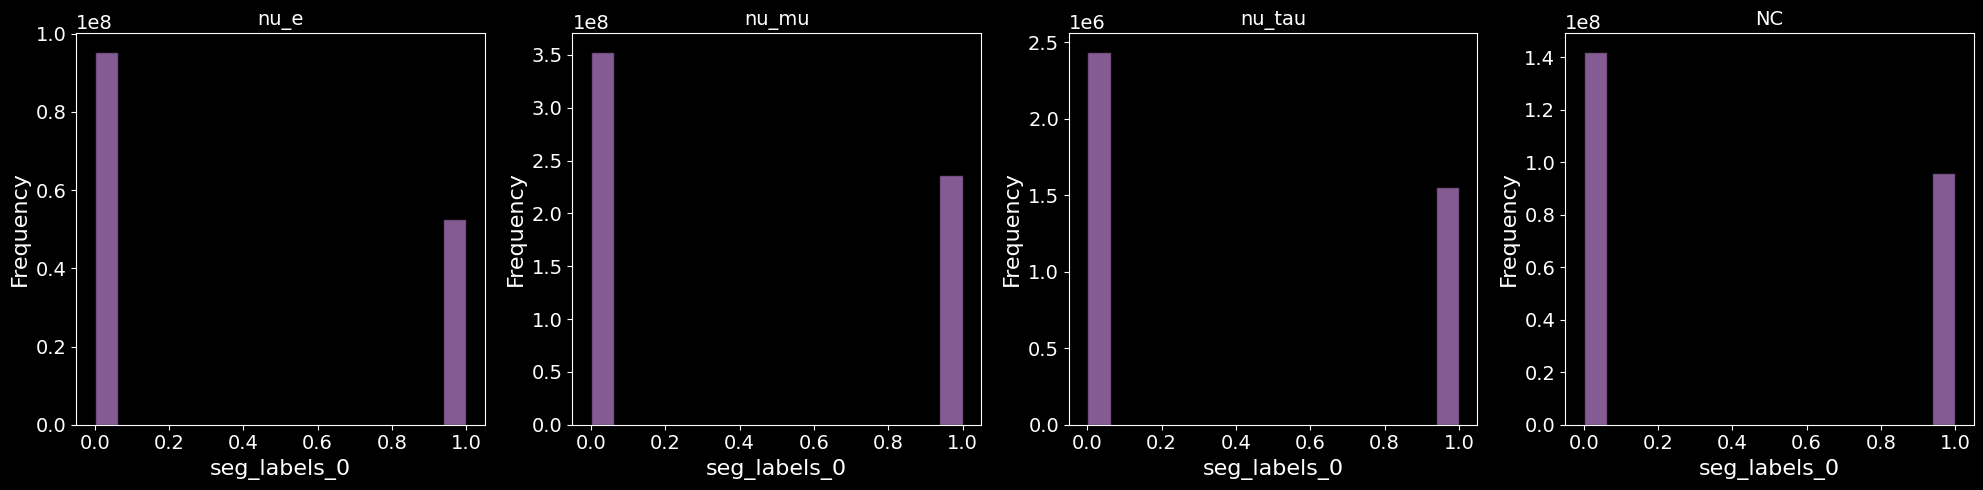

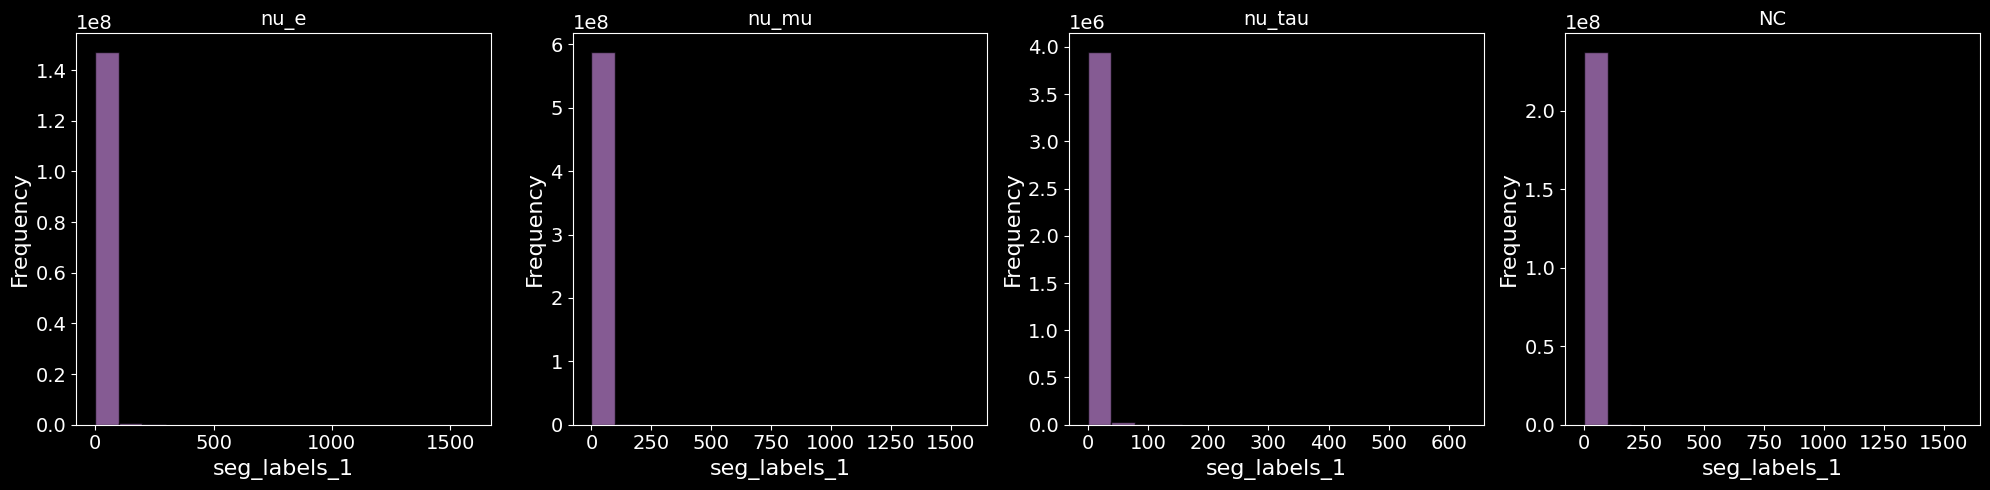

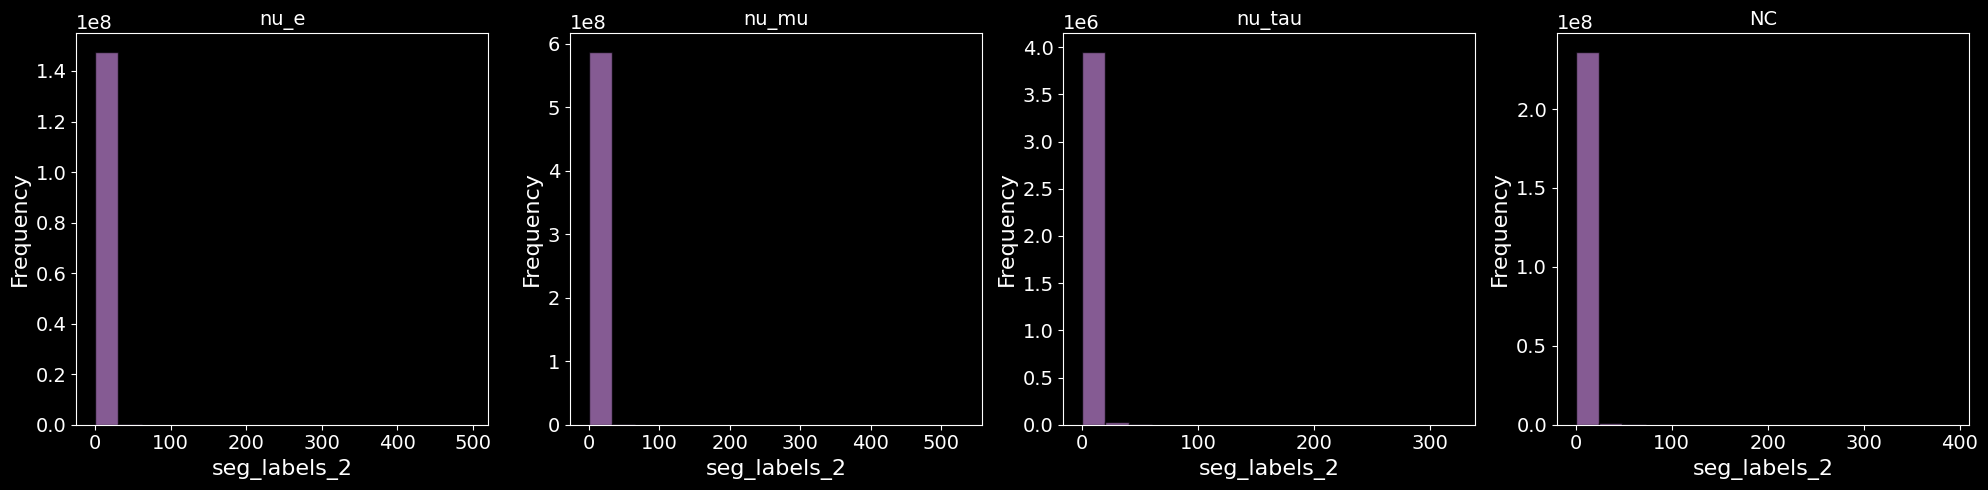

In [10]:
# Example usage to plot 'e_vis'
for feat in variables_to_extract:
    plot_histograms(data_nu_e, data_nu_mu, data_nu_tau, data_nc, feat, bins=16, figsize=(20, 5))

## Primary Vertex X vs Y distribution

min: -1532, max: 1532


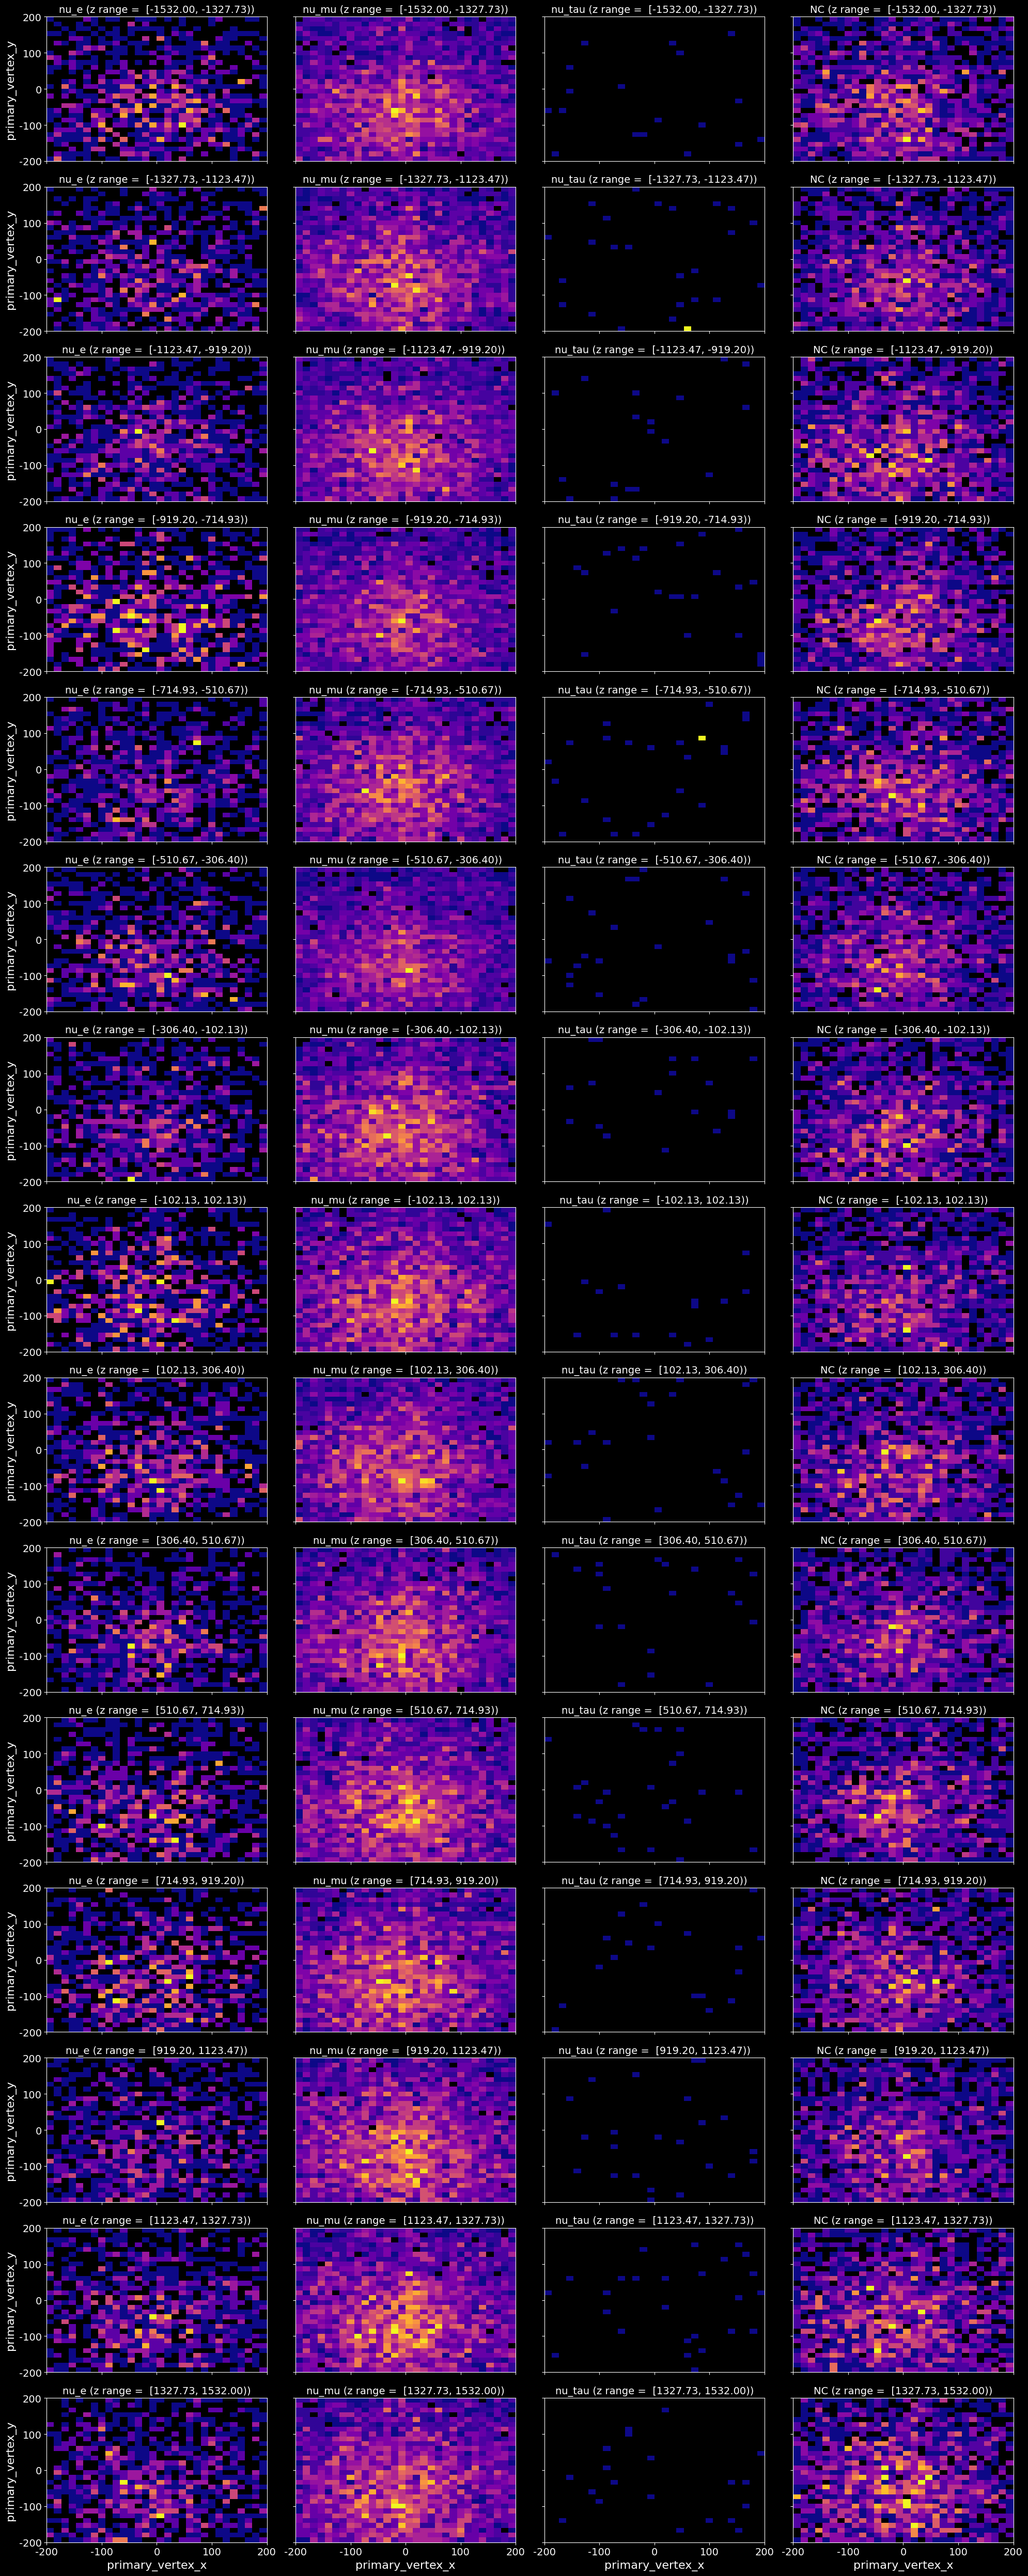

In [11]:
# Define colors
cmap = "plasma"  # Heatmap color map

# Min and max of z (last column)
min_v, max_v = -1532, 1532
print(f"min: {min_v}, max: {max_v}")

# Define 15 z-ranges
ranges = np.linspace(min_v, max_v, 16)  # 16 edges define 15 bins

fig, axes = plt.subplots(15, 4, figsize=(20, 50), sharex=True, sharey=True)

for i in range(15):
    range_min, range_max = ranges[i], ranges[i+1]
    title_suffix = f" [{range_min:.2f}, {range_max:.2f})"

    for j, (data, title) in enumerate(zip(
        [data_nu_e['primary_vertex'], data_nu_mu['primary_vertex'], data_nu_tau['primary_vertex'], data_nc['primary_vertex']], 
        ["nu_e", "nu_mu", "nu_tau", "NC"]
    )):
        mask = (data[:, -1] >= range_min) & (data[:, -1] < range_max)
        
        # 2D Histogram (Heatmap)
        h = axes[i, j].hist2d(
            data[mask, 0],  # x-axis
            data[mask, 1],  # y-axis
            bins=30, cmap=cmap, cmin=1,
            range=[[-200, 200], [-200, 200]]  # Fixed x and y limits
        )

        axes[i, j].set_xlim(-200, 200)
        axes[i, j].set_ylim(-200, 200)
        axes[i, j].set_title(f'{title} (z range = {title_suffix})')

# Common Labels
for ax in axes[:, 0]:
    ax.set_ylabel('primary_vertex_y')

for ax in axes[-1, :]:
    ax.set_xlabel('primary_vertex_x')

plt.tight_layout()
plt.savefig(f"{plot_folder}/primary_vertex_heatmap.png")
plt.show()

# Energy and Position Distributions
- **Energy**: Leptons vs Rest (plot as density histogram)
- **Energy**: EM vs Hadronic vs Ghost
- **Position**: length of the difference leptons voxels -> tau travel more , tau short because decay (Quantify on the dataset) 

### Energy: Lepton vs Rest

In [12]:
for k in data_nu_e.keys():
    print(k, data_nu_e[k].shape)

e_vis (18218,)
sp_momentum (18218, 3)
vis_sp_momentum (18218, 3)
jet_momentum (18218, 3)
pt_miss (18218,)
in_neutrino_momentum (18218, 3)
in_neutrino_energy (18218,)
out_lepton_momentum (18218, 3)
out_lepton_energy (18218,)
rear_cal_energy (18218,)
rear_hcal_energy (18218,)
rear_mucal_energy (18218,)
faser_cal_energy (18218,)
reco_hits (18218,)
primary_vertex (18218, 3)
primlepton_labels (18218,)
seg_labels (18218,)
run_number (18218,)
event_id (18218,)


In [13]:
all_hits_e = np.vstack(data_nu_e['reco_hits'])
all_lepton_label_e = np.vstack(data_nu_e['primlepton_labels'])

mask_lepton_nu_e = all_lepton_label_e == 1
mask_lepton_nu_e = mask_lepton_nu_e.flatten()



all_hits_mu = np.vstack(data_nu_mu['reco_hits'])
all_lepton_label_mu = np.vstack(data_nu_mu['primlepton_labels'])

mask_lepton_nu_mu = all_lepton_label_mu == 1
mask_lepton_nu_mu = mask_lepton_nu_mu.flatten()


all_hits_tau = np.vstack(data_nu_tau['reco_hits'])
all_lepton_label_tau = np.vstack(data_nu_tau['primlepton_labels'])

mask_lepton_nu_tau = all_lepton_label_tau == 1
mask_lepton_nu_tau = mask_lepton_nu_tau.flatten()

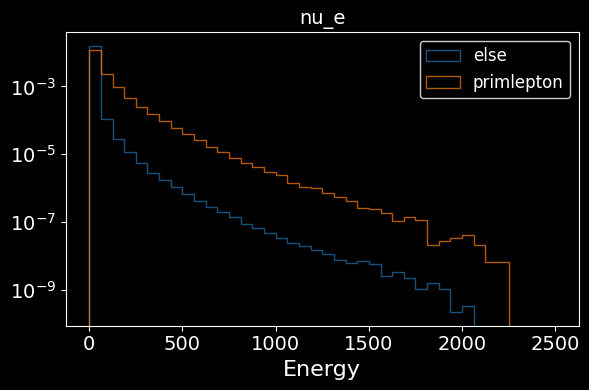

In [14]:
plt.hist(all_hits_e[~mask_lepton_nu_e, 4], bins=40, alpha=0.7, density=True, label='else',range=(0, 2500), histtype='step')
plt.hist(all_hits_e[mask_lepton_nu_e, 4], bins=40, alpha=0.7, density=True, label='primlepton', range=(0, 2500), histtype='step')

# y-axis log
plt.yscale('log')
plt.xlabel('Energy')
plt.title('nu_e')
plt.legend()
plt.savefig(f'{plot_folder}/E_dist_lepton_nu_e.png')
plt.show()

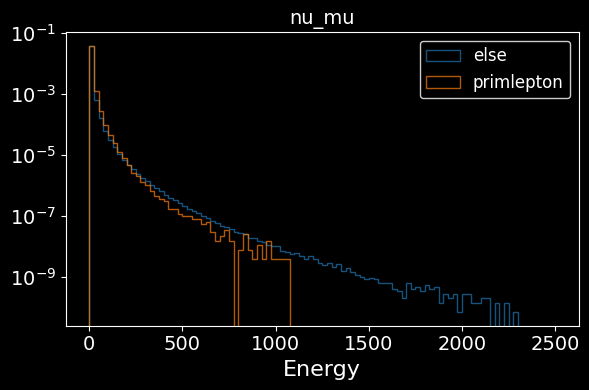

In [15]:
plt.hist(all_hits_mu[~mask_lepton_nu_mu, 4], bins=100, alpha=0.7, density=True, label='else', range=(0, 2500), histtype='step')
plt.hist(all_hits_mu[mask_lepton_nu_mu, 4], bins=100, alpha=0.7, density=True, label='primlepton', range=(0, 2500), histtype='step')
#log scale
plt.yscale('log')
plt.xlabel('Energy')
plt.title('nu_mu')
plt.legend()
plt.savefig(f'{plot_folder}/E_dist_lepton_nu_mu.png')
plt.show()

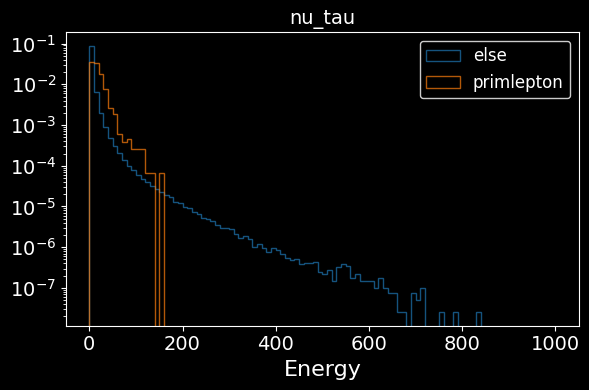

In [16]:
plt.hist(all_hits_tau[~mask_lepton_nu_tau, 4], bins=100, alpha=0.7, density=True, label='else', histtype='step',range=(0, 1000))
plt.hist(all_hits_tau[mask_lepton_nu_tau, 4], bins=100, alpha=0.7, density=True, label='primlepton', histtype='step', range=(0, 1000))

#log scale 
plt.yscale('log')
plt.xlabel('Energy')
plt.title('nu_tau')
plt.legend()
plt.savefig(f'{plot_folder}/E_dist_lepton_nu_tau.png')
plt.show()

### Energy: EM vs Hadronic vs Ghost

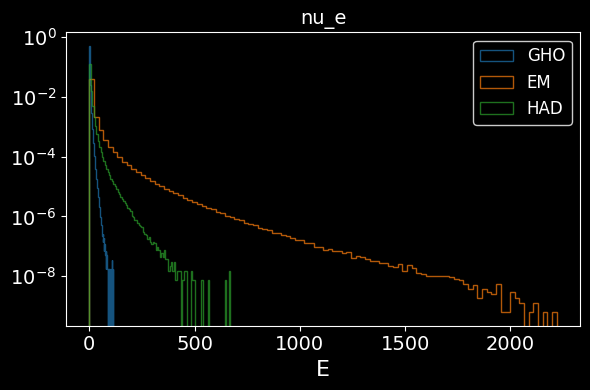

In [17]:
all_hit_label_nu_e = np.vstack(data_nu_e['seg_labels'])
all_hit_label_nu_mu = np.vstack(data_nu_mu['seg_labels'])
all_hit_label_nu_tau = np.vstack(data_nu_tau['seg_labels'])

#create 3 masks with np.argmax to get the label with the highest value
mask_hits_nu_e = np.argmax(all_hit_label_nu_e, axis=1)
mask_hits_nu_mu = np.argmax(all_hit_label_nu_mu, axis=1)
mask_hits_nu_tau = np.argmax(all_hit_label_nu_tau, axis=1)


labels = ['GHO', 'EM', 'HAD']



plt.hist(all_hits_e[mask_hits_nu_e == 0, 4], bins=100, alpha=0.7, density=True, label='GHO', histtype='step')
plt.hist(all_hits_e[mask_hits_nu_e == 1, 4], bins=100, alpha=0.7, density=True, label='EM', histtype='step')
plt.hist(all_hits_e[mask_hits_nu_e == 2, 4], bins=100, alpha=0.7, density=True, label='HAD', histtype='step')

plt.yscale('log')
plt.title('nu_e')
plt.xlabel('E')
plt.legend()
plt.savefig(f'{plot_folder}/E_dist_hits_nu_e.png')
plt.show()

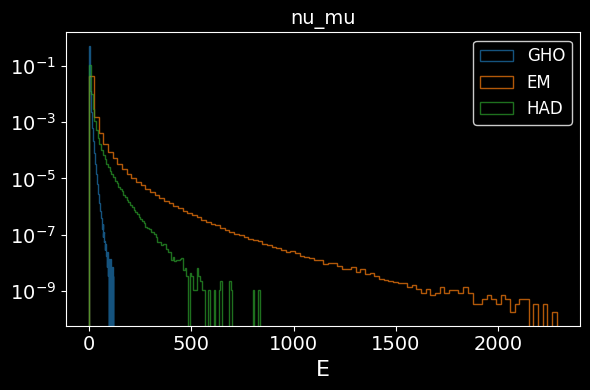

In [18]:
plt.hist(all_hits_mu[mask_hits_nu_mu == 0, 4], bins=100, alpha=0.7, density=True, label='GHO', histtype='step')
plt.hist(all_hits_mu[mask_hits_nu_mu == 1, 4], bins=100, alpha=0.7, density=True, label='EM', histtype='step')
plt.hist(all_hits_mu[mask_hits_nu_mu == 2, 4], bins=100, alpha=0.7, density=True, label='HAD', histtype='step')

plt.yscale('log')
plt.title('nu_mu')
plt.xlabel('E')
plt.legend()
plt.savefig(f'{plot_folder}/E_dist_hits_nu_mu.png')
plt.show()

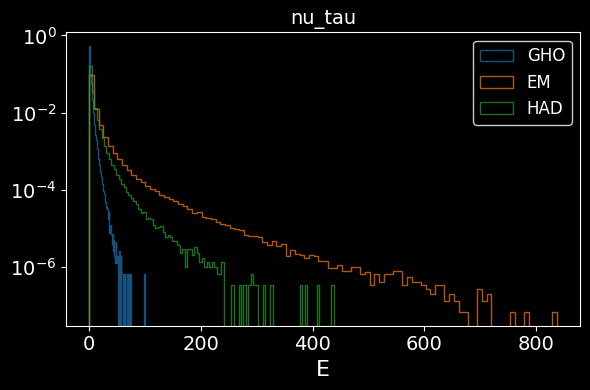

In [19]:
plt.hist(all_hits_tau[mask_hits_nu_tau == 0, 4], bins=100, alpha=0.7, density=True, label='GHO', histtype='step')
plt.hist(all_hits_tau[mask_hits_nu_tau == 1, 4], bins=100, alpha=0.7, density=True, label='EM', histtype='step')
plt.hist(all_hits_tau[mask_hits_nu_tau == 2, 4], bins=100, alpha=0.7, density=True, label='HAD', histtype='step')

plt.yscale('log')
plt.title('nu_tau')
plt.xlabel('E')
plt.legend()
plt.savefig(f'{plot_folder}/E_dist_hits_nu_tau.png')
plt.show()

## Position Distributions
- **Position**: length of the difference leptons voxels -> tau travel more , tau short because decay (Quantify on the dataset)


In [20]:
#create new np array with the vstack of the hits and labels
all_hits = np.vstack(data_nu_e['reco_hits'])
all_lepton_label = np.vstack(data_nu_e['primlepton_labels'])

n_hits_per_event = np.array([len(hits) for hits in data_nu_e['reco_hits']])
n_events = len(n_hits_per_event)

In [21]:
# add all_lepton_label to all_hits
all_hits = np.hstack([all_hits, all_lepton_label])
print(all_hits.shape)

(148026647, 7)


In [22]:
ev_id_cloned = np.repeat(data_nu_e['event_id'], n_hits_per_event)
print(ev_id_cloned.shape)

(148026647,)


In [23]:
#add the event_id to the all_hits
all_hits = np.hstack([all_hits, ev_id_cloned[:, None]])
print(all_hits.shape)

(148026647, 8)


Funniest error ever: Unable to allocate 2.45 TiB for an array with shape (18218, 148026647) and data type bool

In [24]:
# Assuming `all_hits` is your dataset, with event IDs in the last column and values in the 4th column (index 3)
event_ids = all_hits[:, -1]  # Event IDs (last column)
unique_event_ids = np.unique(event_ids)

# Divide the dataset into smaller chunks
chunk_size = 1000000  # Adjust this based on your memory capacity
num_chunks = len(all_hits) // chunk_size + 1

# Initialize arrays for max and min values
event_max = -np.inf * np.ones(len(unique_event_ids))
event_min = np.inf * np.ones(len(unique_event_ids))

# Iterate over chunks
for chunk_start in range(0, len(all_hits), chunk_size):
    print(f"Processing chunk {chunk_start // chunk_size + 1}/{num_chunks}")
    chunk_end = min(chunk_start + chunk_size, len(all_hits))
    chunk_data = all_hits[chunk_start:chunk_end]

    # Get the event IDs for the current chunk
    chunk_event_ids = chunk_data[:, -1]

    # Mask for the event IDs in the current chunk
    event_masks = np.equal(chunk_event_ids[:, None], unique_event_ids)

    # For each event ID in this chunk, calculate max and min for the 3th column (index 2)
    # Use np.take to select the relevant values based on the event masks
    event_max_chunk = np.max(np.take(chunk_data[:, 2], event_masks.nonzero()[0]), axis=0)
    event_min_chunk = np.min(np.take(chunk_data[:, 2], event_masks.nonzero()[0]), axis=0)

    # Update the global max and min values
    event_max = np.maximum(event_max, event_max_chunk)
    event_min = np.minimum(event_min, event_min_chunk)

# Calculate the absolute differences
dist = np.abs(event_max - event_min)

# Print the result
print(dist)


Processing chunk 1/149


KeyboardInterrupt: 

In [ ]:
# Create the individual arrays with different shapes
arr1 = np.random.randint(0, 10, size=(6, 6))
arr2 = np.random.randint(0, 10, size=(4, 6))
arr3 = np.random.randint(0, 10, size=(5, 6))

a = np.empty((3,), dtype=object)  # This will create a 1D array with 3 elements, each being an ndarray

# Assign the arrays to the elements of `a`
a[0] = arr1
a[1] = arr2
a[2] = arr3

b = np.vstack(a)
#create a fictitious array with the event id
ev_id = np.array([1, 2, 3])
dim_arrays = [arr1.shape[0], arr2.shape[0], arr3.shape[0]]
ev_id_cloned = np.repeat(ev_id, dim_arrays)

#add the ev_id to the b array
b_with_ev_id = np.hstack((b, ev_id_cloned[:, None]))


# Initialize list to store max values
max_values = []

# Loop over unique event IDs
for i in np.unique(ev_id):
    print(f"Event id: {i}")
    mask_ev_id = b_with_ev_id[:, -1] == i
    print(f"Third column data for event id {i}: {b_with_ev_id[mask_ev_id, 2]}")
    event_max = np.max(b_with_ev_id[mask_ev_id, 2])
    max_values.append(event_max)
    print(f"Max value for event id {i}: {event_max}")

# Optionally, print all max values
print("All max values:", max_values)


Event id: 1
Third column data for event id 1: [4 2 2 3 8 0]
Max value for event id 1: 8
Event id: 2
Third column data for event id 2: [7 9 7 3]
Max value for event id 2: 9
Event id: 3
Third column data for event id 3: [8 0 9 1 9]
Max value for event id 3: 9
All max values: [np.int64(8), np.int64(9), np.int64(9)]


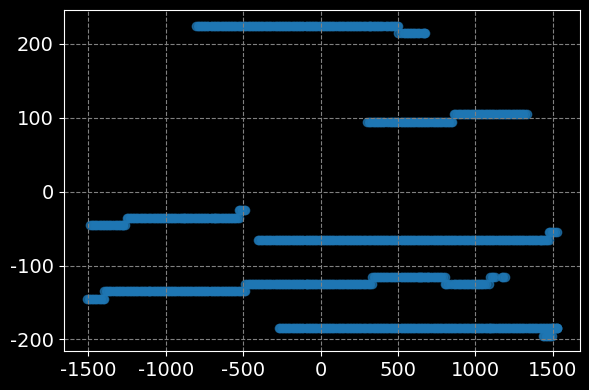

In [ ]:
#fist coord are tthe x, mask only the one that are for the lepton, plot just the first 100 hits
plt.scatter(all_hits_e[mask_lepton_nu_e, 2][:1000], all_hits_e[mask_lepton_nu_e, 1][:1000], alpha=0.7, label='primlepton')